# Data Preparation

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

## Importing Data
The dataset contains all data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club

In [3]:
loan_data_backup = pd.read_csv(r"./Loan data 2007-2014/3.1 loan_data_2007_2014.csv")

/tmp/ipykernel_194950/3756377201.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv(r"./Loan data 2007-2014/3.1 loan_data_2007_2014.csv")


In [4]:
loan_data = loan_data_backup.copy()

## Exploring Data

In [5]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


## General Preprocessing

### Preprocessing few continuous variables

In [6]:
loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [7]:
# Filling N/A's with 0's
loan_data['emp_length'] = loan_data['emp_length'].fillna('0')

In [8]:
# Converting emp_length to numric dtype
loan_data['emp_length'] = loan_data['emp_length'].str.split(' ').str[0]
loan_data['emp_length'] = loan_data['emp_length'].str.replace('<', '0')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('+', '')

loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length']) 

In [9]:
# Converting to dt
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [10]:
# Calculating months since earliset credit
calculation_date = '2017-12-01'
loan_data['mths_since_earliest_cr_line'] = round(
                                                    (pd.to_datetime(calculation_date) - loan_data['earliest_cr_line']) / np.timedelta64(1, 'M')
                                            )

In [11]:
# Dates prior to 1970 were converted as dates in the future. We will change it to max date 
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

/tmp/ipykernel_194950/1660191827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [12]:
# Converting loan term to numeric dtype
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))

In [13]:
# Converting issue date to dt
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [14]:
# Calculating number of month since issue date
loan_data['mths_since_issue_d'] = round((pd.to_datetime(calculation_date) - loan_data['issue_d']) / np.timedelta64(1, 'M'))
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         50.204806
std          14.190212
min          35.000000
25%          40.000000
50%          46.000000
75%          56.000000
max         124.000000
Name: mths_since_issue_d, dtype: float64

### Preprocessing few discrete variables

Variables to preprocess:  
* grade,  
* sub_grade,  
* home_ownership,  
* verification_status,  
* loan_status,  
* purpose,  
* addr_state,  
* initial_list_status

In [15]:
# Creating lists for dummies and required discrete variables
loan_data_dummies = []
dvariables = ['grade', 'sub_grade','home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'initial_list_status']

# Populating dummy list
for i in dvariables:
    loan_data_dummies.append(pd.get_dummies(loan_data[i], prefix = i, prefix_sep = ':'))

# Concatinating dummies with original df
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)


### Checking for missing values

In [16]:
# Filling N/A's for revolver credits using the funded amount
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [17]:
# Filling the missing anuual income with mean value of the non-missing values.
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)


In [18]:
# Other variables are filled with zeroes
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length'].fillna(0, inplace=True)


# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [20]:
loan_data['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [21]:
# Calculating % of loans with each status
round(loan_data['loan_status'].value_counts() / loan_data['loan_status'].count() * 100, 2)

loan_status
Current                                                48.09
Fully Paid                                             39.62
Charged Off                                             9.11
Late (31-120 days)                                      1.48
In Grace Period                                         0.67
Does not meet the credit policy. Status:Fully Paid      0.43
Late (16-30 days)                                       0.26
Default                                                 0.18
Does not meet the credit policy. Status:Charged Off     0.16
Name: count, dtype: float64

In [22]:
# Marking bad loans as "0" and good ones with "1"
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)


In [23]:
loan_data.to_csv('./loan_data_2007_2014_preprocessed.csv')

### Splitting Data

In [25]:
# Importing library
from sklearn.model_selection import train_test_split


In [30]:
# Splitting dataframe with test size of 20% and specific seed # for comparability
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)


### Creating WoE calculation function and visualization 

In [63]:
type(df_temp)

pandas.core.frame.DataFrame

In [66]:
# Creating a function to calculate WoE
def woe_discrete(df: pd.core.frame.DataFrame, discrete_variabe_name: str, good_bad_variable_df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = df.groupby(discrete_variabe_name, as_index = False)['good_bad'].agg(['count', 'mean'])
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [58]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [65]:
# Creating plot function
def plot_by_woe(df_WoE: pd.core.frame.DataFrame, rotation_of_x_axis_labels: int = 0) -> None:
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

### Preprocessing Discrete Variables: Credit rating

In [52]:
# Calculation for "grade" variable
df_temp = woe_discrete(loan_data_inputs_train, 'grade', loan_data_targets_train)

df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


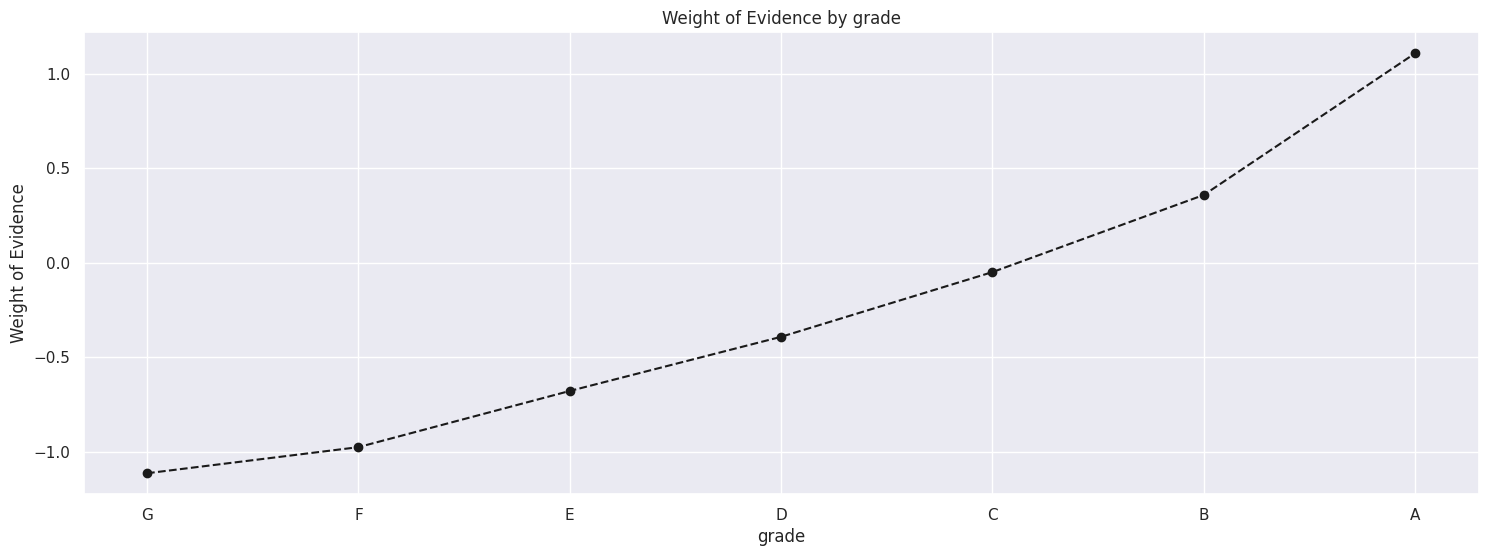

In [55]:
# Testing the function using woe table for "grade" variable
plot_by_woe(df_temp)


### Results  
As expected Credit rating has a  good pattern on weights of evidence. We will use rating "G" as a reference for our model 

### Preprocessing Discrete Variable: Home ownership

In [62]:
df_temp = woe_discrete(loan_data_inputs_train, 'home_ownership', loan_data_targets_train)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


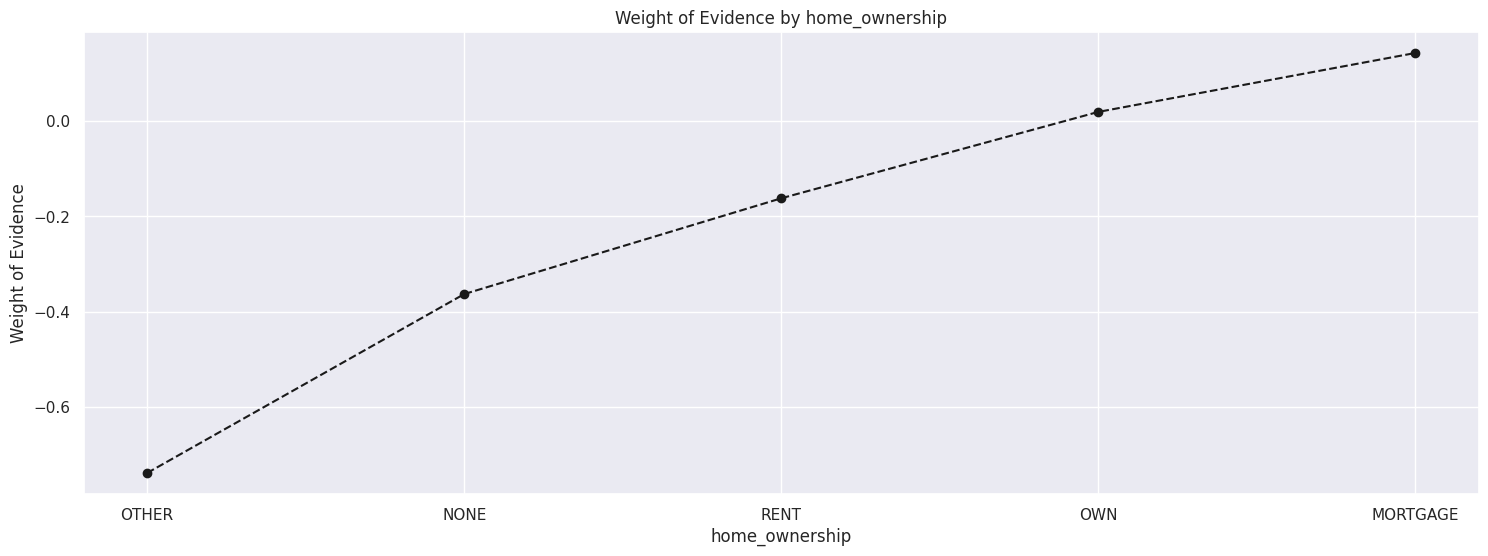

In [67]:
# Plotting "home_ownership" variable
plot_by_woe(df_temp)

In [68]:
# There are too few observations for "other", "any" and "none". We will combine these values with "rent" and create a dummy variable
loan_data_inputs_train['home_ownership:RENT_OTHER_NONE_ANY'] = sum([
                                                                loan_data_inputs_train['home_ownership:RENT']
                                                                , loan_data_inputs_train['home_ownership:OTHER']
                                                                , loan_data_inputs_train['home_ownership:NONE']
                                                                , loan_data_inputs_train['home_ownership:ANY']
                                                                ])

Variable "home_ownership:RENT_OTHER_NONE_ANY" will be used as a reference for our model 

In [159]:
loan_data_inputs_test['home_ownership:RENT_OTHER_NONE_ANY'] = sum([
                                                                loan_data_inputs_test['home_ownership:RENT']
                                                                , loan_data_inputs_test['home_ownership:OTHER']
                                                                , loan_data_inputs_test['home_ownership:NONE']
                                                                , loan_data_inputs_test['home_ownership:ANY']
                                                                ])

### Preprocessing Discrete Variable: State

In [70]:
df_temp = woe_discrete(loan_data_inputs_train, 'addr_state', loan_data_targets_train)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


In [71]:
# North Dakota state is not present in a dataframe, let's add it with a value of "0"
loan_data_inputs_train['addr_state:ND'] = 0

In [160]:
loan_data_inputs_test['addr_state:ND'] = 0

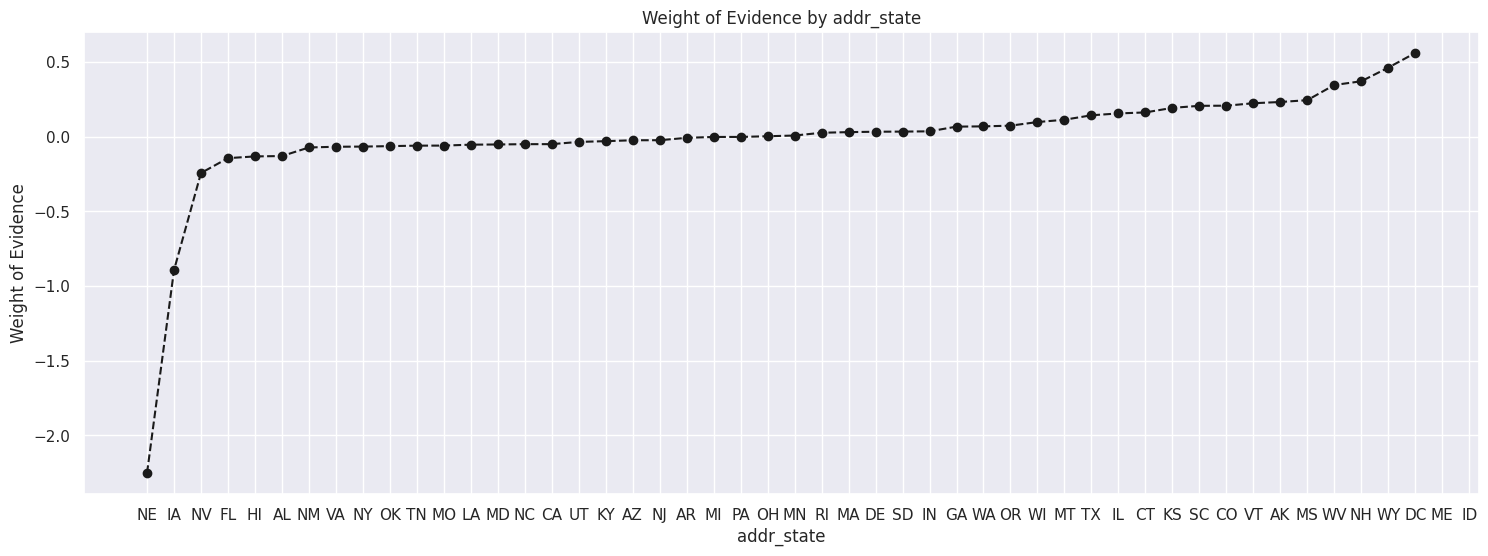

In [72]:
plot_by_woe(df_temp)

The number of observations for NE & IA are too small, we will combine it with the missing state ND for the sake of prudence. The category with the lowes WoE (the reference) will consist of 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'   
Other categories, based on WoE and number of observations, are presented below:
* 'NM' 'VA'
* 'NY'
* 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
* 'CA'
* 'UT' 'KY' 'AZ' 'NJ'
* 'AR' 'MI' 'PA' 'OH' 'MN'
* 'RI' 'MA' 'DE' 'SD' 'IN'
* 'GA' 'WA' 'OR'
* 'WI' 'MT'
* 'TX'
* 'IL' 'CT'
* 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
* 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'


In [73]:
# Creating address categories
loan_data_inputs_train['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([loan_data_inputs_train['addr_state:ND'], loan_data_inputs_train['addr_state:NE'],
                                              loan_data_inputs_train['addr_state:IA'], loan_data_inputs_train['addr_state:NV'],
                                              loan_data_inputs_train['addr_state:FL'], loan_data_inputs_train['addr_state:HI'],
                                                          loan_data_inputs_train['addr_state:AL']])

loan_data_inputs_train['addr_state:NM_VA'] = sum([loan_data_inputs_train['addr_state:NM'], loan_data_inputs_train['addr_state:VA']])

loan_data_inputs_train['addr_state:OK_TN_MO_LA_MD_NC'] = sum([loan_data_inputs_train['addr_state:OK'], loan_data_inputs_train['addr_state:TN'],
                                              loan_data_inputs_train['addr_state:MO'], loan_data_inputs_train['addr_state:LA'],
                                              loan_data_inputs_train['addr_state:MD'], loan_data_inputs_train['addr_state:NC']])

loan_data_inputs_train['addr_state:UT_KY_AZ_NJ'] = sum([loan_data_inputs_train['addr_state:UT'], loan_data_inputs_train['addr_state:KY'],
                                              loan_data_inputs_train['addr_state:AZ'], loan_data_inputs_train['addr_state:NJ']])

loan_data_inputs_train['addr_state:AR_MI_PA_OH_MN'] = sum([loan_data_inputs_train['addr_state:AR'], loan_data_inputs_train['addr_state:MI'],
                                              loan_data_inputs_train['addr_state:PA'], loan_data_inputs_train['addr_state:OH'],
                                              loan_data_inputs_train['addr_state:MN']])

loan_data_inputs_train['addr_state:RI_MA_DE_SD_IN'] = sum([loan_data_inputs_train['addr_state:RI'], loan_data_inputs_train['addr_state:MA'],
                                              loan_data_inputs_train['addr_state:DE'], loan_data_inputs_train['addr_state:SD'],
                                              loan_data_inputs_train['addr_state:IN']])

loan_data_inputs_train['addr_state:GA_WA_OR'] = sum([loan_data_inputs_train['addr_state:GA'], loan_data_inputs_train['addr_state:WA'],
                                              loan_data_inputs_train['addr_state:OR']])

loan_data_inputs_train['addr_state:WI_MT'] = sum([loan_data_inputs_train['addr_state:WI'], loan_data_inputs_train['addr_state:MT']])

loan_data_inputs_train['addr_state:IL_CT'] = sum([loan_data_inputs_train['addr_state:IL'], loan_data_inputs_train['addr_state:CT']])

loan_data_inputs_train['addr_state:KS_SC_CO_VT_AK_MS'] = sum([loan_data_inputs_train['addr_state:KS'], loan_data_inputs_train['addr_state:SC'],
                                              loan_data_inputs_train['addr_state:CO'], loan_data_inputs_train['addr_state:VT'],
                                              loan_data_inputs_train['addr_state:AK'], loan_data_inputs_train['addr_state:MS']])

loan_data_inputs_train['addr_state:WV_NH_WY_DC_ME_ID'] = sum([loan_data_inputs_train['addr_state:WV'], loan_data_inputs_train['addr_state:NH'],
                                              loan_data_inputs_train['addr_state:WY'], loan_data_inputs_train['addr_state:DC'],
                                              loan_data_inputs_train['addr_state:ME'], loan_data_inputs_train['addr_state:ID']])

In [161]:
# Creating address categories
loan_data_inputs_test['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([loan_data_inputs_test['addr_state:ND'], loan_data_inputs_test['addr_state:NE'],
                                              loan_data_inputs_test['addr_state:IA'], loan_data_inputs_test['addr_state:NV'],
                                              loan_data_inputs_test['addr_state:FL'], loan_data_inputs_test['addr_state:HI'],
                                                          loan_data_inputs_test['addr_state:AL']])

loan_data_inputs_test['addr_state:NM_VA'] = sum([loan_data_inputs_test['addr_state:NM'], loan_data_inputs_test['addr_state:VA']])

loan_data_inputs_test['addr_state:OK_TN_MO_LA_MD_NC'] = sum([loan_data_inputs_test['addr_state:OK'], loan_data_inputs_test['addr_state:TN'],
                                              loan_data_inputs_test['addr_state:MO'], loan_data_inputs_test['addr_state:LA'],
                                              loan_data_inputs_test['addr_state:MD'], loan_data_inputs_test['addr_state:NC']])

loan_data_inputs_test['addr_state:UT_KY_AZ_NJ'] = sum([loan_data_inputs_test['addr_state:UT'], loan_data_inputs_test['addr_state:KY'],
                                              loan_data_inputs_test['addr_state:AZ'], loan_data_inputs_test['addr_state:NJ']])

loan_data_inputs_test['addr_state:AR_MI_PA_OH_MN'] = sum([loan_data_inputs_test['addr_state:AR'], loan_data_inputs_test['addr_state:MI'],
                                              loan_data_inputs_test['addr_state:PA'], loan_data_inputs_test['addr_state:OH'],
                                              loan_data_inputs_test['addr_state:MN']])

loan_data_inputs_test['addr_state:RI_MA_DE_SD_IN'] = sum([loan_data_inputs_test['addr_state:RI'], loan_data_inputs_test['addr_state:MA'],
                                              loan_data_inputs_test['addr_state:DE'], loan_data_inputs_test['addr_state:SD'],
                                              loan_data_inputs_test['addr_state:IN']])

loan_data_inputs_test['addr_state:GA_WA_OR'] = sum([loan_data_inputs_test['addr_state:GA'], loan_data_inputs_test['addr_state:WA'],
                                              loan_data_inputs_test['addr_state:OR']])

loan_data_inputs_test['addr_state:WI_MT'] = sum([loan_data_inputs_test['addr_state:WI'], loan_data_inputs_test['addr_state:MT']])

loan_data_inputs_test['addr_state:IL_CT'] = sum([loan_data_inputs_test['addr_state:IL'], loan_data_inputs_test['addr_state:CT']])

loan_data_inputs_test['addr_state:KS_SC_CO_VT_AK_MS'] = sum([loan_data_inputs_test['addr_state:KS'], loan_data_inputs_test['addr_state:SC'],
                                              loan_data_inputs_test['addr_state:CO'], loan_data_inputs_test['addr_state:VT'],
                                              loan_data_inputs_test['addr_state:AK'], loan_data_inputs_test['addr_state:MS']])

loan_data_inputs_test['addr_state:WV_NH_WY_DC_ME_ID'] = sum([loan_data_inputs_test['addr_state:WV'], loan_data_inputs_test['addr_state:NH'],
                                              loan_data_inputs_test['addr_state:WY'], loan_data_inputs_test['addr_state:DC'],
                                              loan_data_inputs_test['addr_state:ME'], loan_data_inputs_test['addr_state:ID']])

### Preprocessing Discrete Variable: Verification Status

In [76]:
# Calculating WoE for "verification_status"
df_temp = woe_discrete(loan_data_inputs_train, 'verification_status', loan_data_targets_train)

df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,NaN,NaN,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.023137,0.226891,0.020384
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.009761,0.109311,0.020384


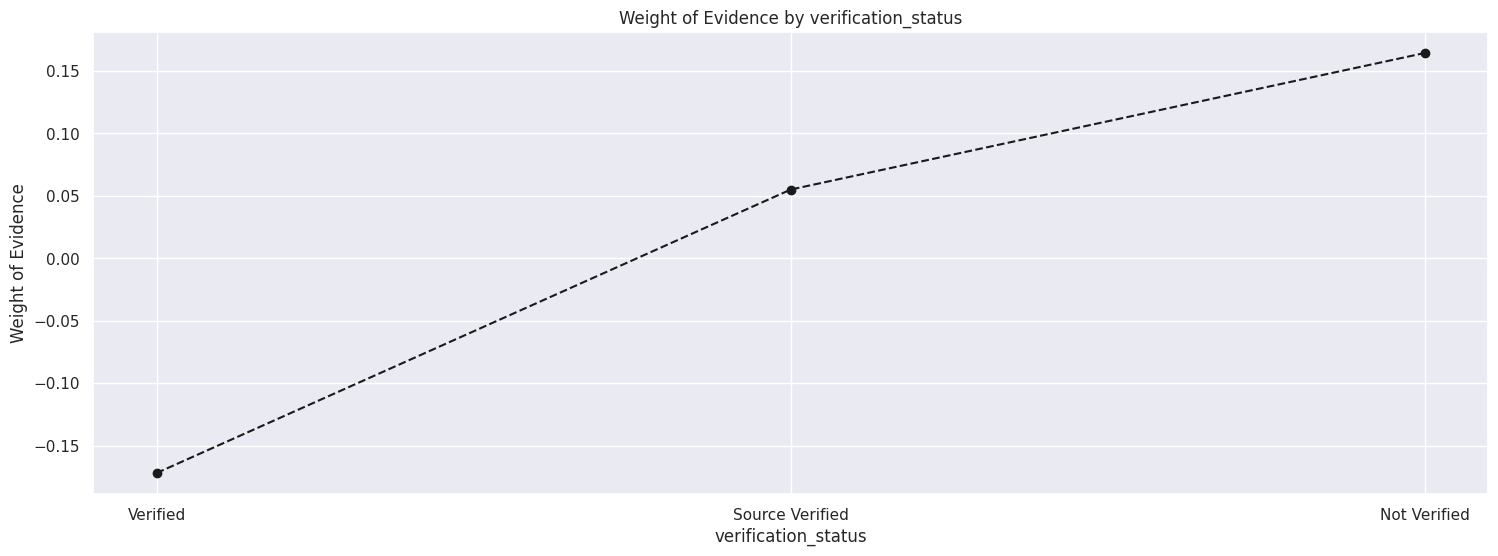

In [78]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variable: Purpose

In [79]:
# Calculating WoE for "purpose"
df_temp = woe_discrete(loan_data_inputs_train, 'purpose', loan_data_targets_train)

df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


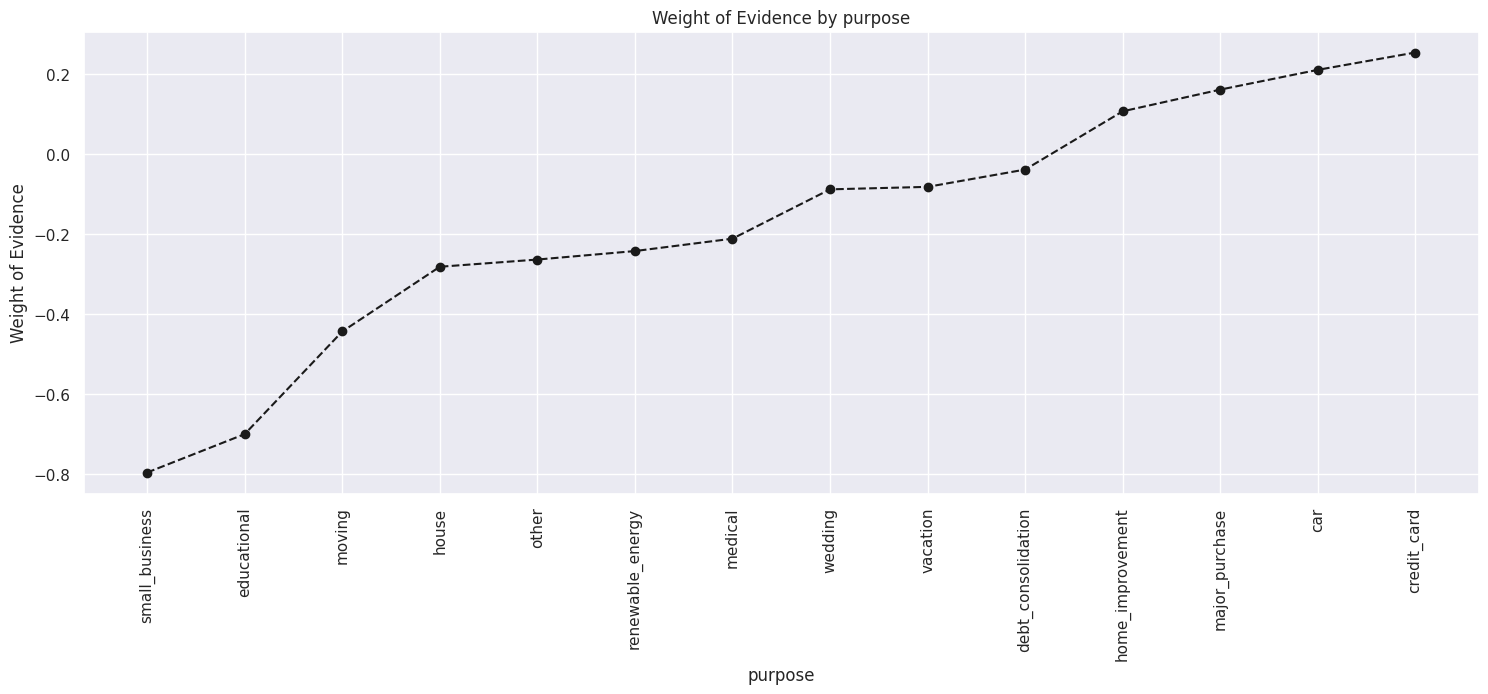

In [80]:
plot_by_woe(df_temp, 90)

Based on the data above we will create the following categories:  
* 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' as **'educ__sm_b__wedd__ren_en__mov__house'** - reference  
* 'other', 'medical', 'vacation' as **'oth__med__vacation'**  
* 'major_purchase', 'car', 'home_improvement' as **'major_purch__car__home_impr'**  
* **'debt_consolidtion'** - separate category due to large number of observations  
* **'credit_card'** - separate category  

In [81]:
loan_data_inputs_train['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([loan_data_inputs_train['purpose:educational'], loan_data_inputs_train['purpose:small_business'],
                                                                 loan_data_inputs_train['purpose:wedding'], loan_data_inputs_train['purpose:renewable_energy'],
                                                                 loan_data_inputs_train['purpose:moving'], loan_data_inputs_train['purpose:house']])
loan_data_inputs_train['purpose:oth__med__vacation'] = sum([loan_data_inputs_train['purpose:other'], loan_data_inputs_train['purpose:medical'],
                                             loan_data_inputs_train['purpose:vacation']])
loan_data_inputs_train['purpose:major_purch__car__home_impr'] = sum([loan_data_inputs_train['purpose:major_purchase'], loan_data_inputs_train['purpose:car'],
                                                        loan_data_inputs_train['purpose:home_improvement']])

In [162]:
loan_data_inputs_test['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([loan_data_inputs_test['purpose:educational'], loan_data_inputs_test['purpose:small_business'],
                                                                 loan_data_inputs_test['purpose:wedding'], loan_data_inputs_test['purpose:renewable_energy'],
                                                                 loan_data_inputs_test['purpose:moving'], loan_data_inputs_test['purpose:house']])
loan_data_inputs_test['purpose:oth__med__vacation'] = sum([loan_data_inputs_test['purpose:other'], loan_data_inputs_test['purpose:medical'],
                                             loan_data_inputs_test['purpose:vacation']])
loan_data_inputs_test['purpose:major_purch__car__home_impr'] = sum([loan_data_inputs_test['purpose:major_purchase'], loan_data_inputs_test['purpose:car'],
                                                        loan_data_inputs_test['purpose:home_improvement']])

### Preprocessing Discrete Variable: Initial list status

In [82]:
df_temp = woe_discrete(loan_data_inputs_train, 'initial_list_status', loan_data_targets_train)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,NaN,NaN,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.031412,0.337675,0.02478


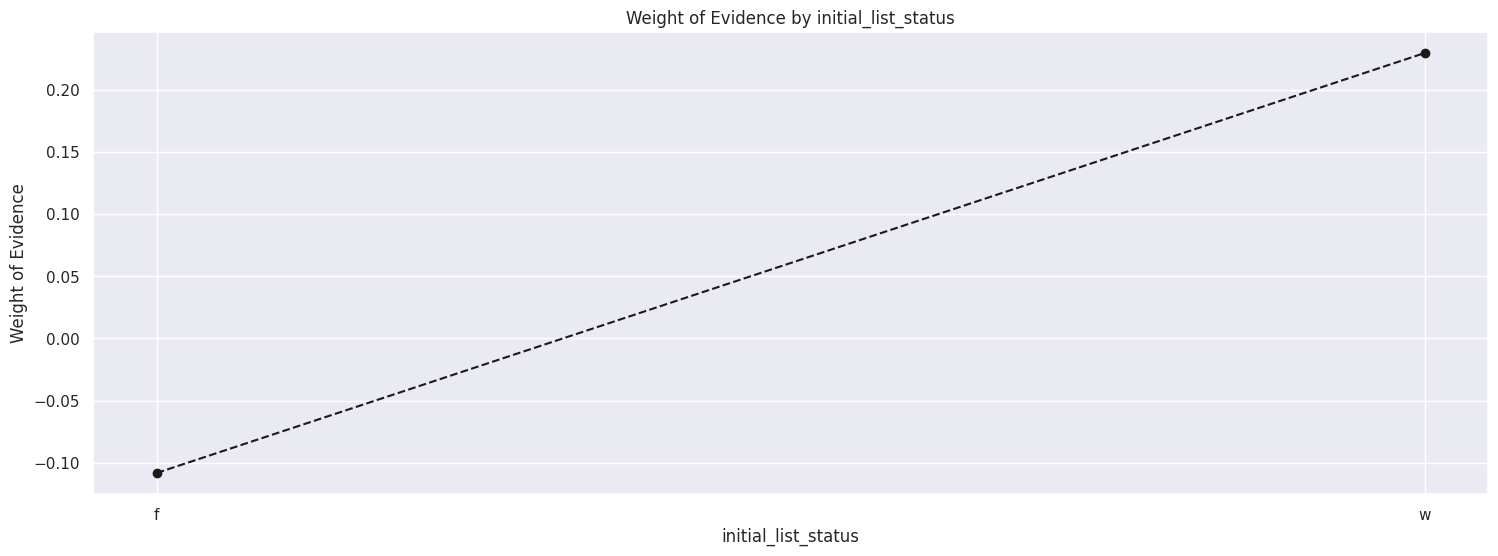

In [83]:
plot_by_woe(df_temp)

### Creating WoE function for continious variables

In [74]:
# Function for continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continuous Variables: Term

In [85]:
# Calculating WoE for "term"
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'term', loan_data_targets_train)

df_temp

,term,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


In [93]:
# Creating dummies for "term" variable
loan_data_inputs_train['term:36'] = loan_data_inputs_train.apply(lambda x: 1 if x['term'] == 36 else 0, axis = 1)
loan_data_inputs_train['term:60'] = loan_data_inputs_train.apply(lambda x: 1 if x['term'] == 60 else 0, axis = 1)

In [163]:
# Creating dummies for "term" variable
loan_data_inputs_test['term:36'] = loan_data_inputs_test.apply(lambda x: 1 if x['term'] == 36 else 0, axis = 1)
loan_data_inputs_test['term:60'] = loan_data_inputs_test.apply(lambda x: 1 if x['term'] == 60 else 0, axis = 1)

### Preprocessing Continuous Variables: Employment length

In [95]:
# Calculating WoE for "emp_length"
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'emp_length', loan_data_targets_train)

df_temp

,emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


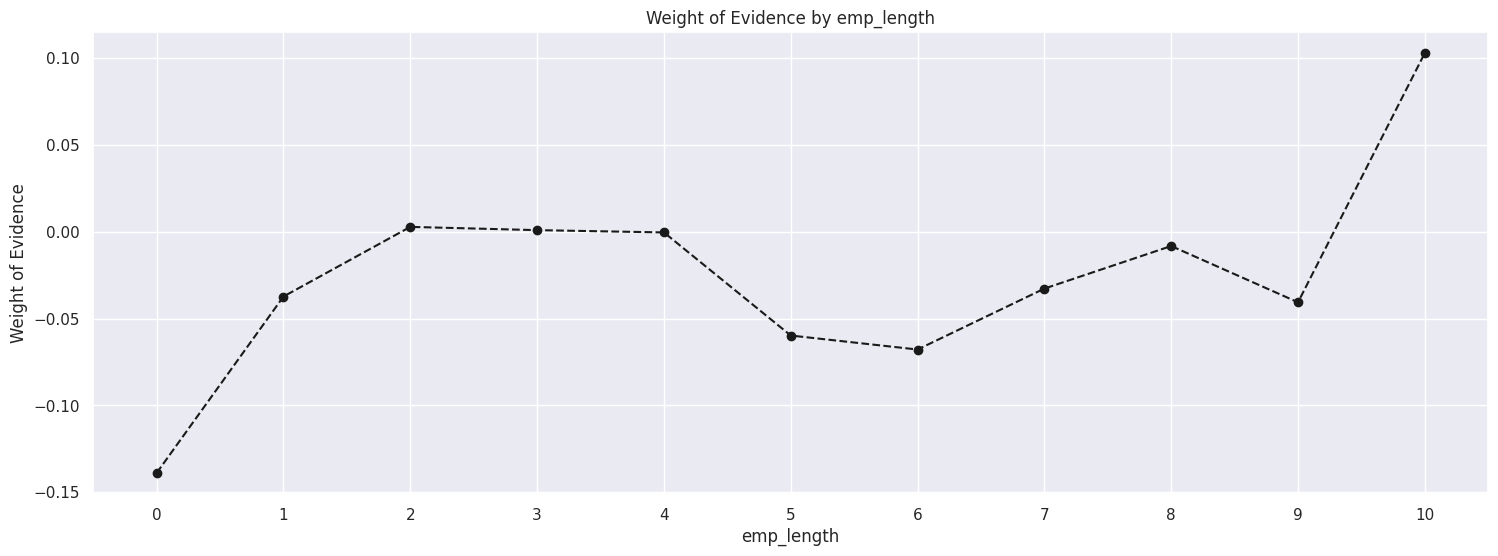

In [96]:
plot_by_woe(df_temp)

In [102]:
# Creating the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'

loan_data_inputs_train['emp_length:0'] = loan_data_inputs_train.apply(lambda x: 1 if x['emp_length'] in [0] else 0, axis = 1)
loan_data_inputs_train['emp_length:1'] = loan_data_inputs_train.apply(lambda x: 1 if x['emp_length'] in [1] else 0, axis = 1)
loan_data_inputs_train['emp_length:2-4'] = loan_data_inputs_train.apply(lambda x: 1 if x['emp_length'] in range(2, 5) else 0, axis = 1)
loan_data_inputs_train['emp_length:5-6'] = loan_data_inputs_train.apply(lambda x: 1 if x['emp_length'] in range(5, 7) else 0, axis = 1)
loan_data_inputs_train['emp_length:7-9'] = loan_data_inputs_train.apply(lambda x: 1 if x['emp_length'] in range(7, 10) else 0, axis = 1)
loan_data_inputs_train['emp_length:10'] = loan_data_inputs_train.apply(lambda x: 1 if x['emp_length'] in [10] else 0, axis = 1)

In [164]:
# Creating the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'

loan_data_inputs_test['emp_length:0'] = loan_data_inputs_test.apply(lambda x: 1 if x['emp_length'] in [0] else 0, axis = 1)
loan_data_inputs_test['emp_length:1'] = loan_data_inputs_test.apply(lambda x: 1 if x['emp_length'] in [1] else 0, axis = 1)
loan_data_inputs_test['emp_length:2-4'] = loan_data_inputs_test.apply(lambda x: 1 if x['emp_length'] in range(2, 5) else 0, axis = 1)
loan_data_inputs_test['emp_length:5-6'] = loan_data_inputs_test.apply(lambda x: 1 if x['emp_length'] in range(5, 7) else 0, axis = 1)
loan_data_inputs_test['emp_length:7-9'] = loan_data_inputs_test.apply(lambda x: 1 if x['emp_length'] in range(7, 10) else 0, axis = 1)
loan_data_inputs_test['emp_length:10'] = loan_data_inputs_test.apply(lambda x: 1 if x['emp_length'] in [10] else 0, axis = 1)

### Preprocessing Continuous Variables: Month since issue

In [103]:
# Fine classing variable into 50 categories
loan_data_inputs_train['mths_since_issue_d_factor'] = pd.cut(loan_data_inputs_train['mths_since_issue_d'], 50)

In [104]:
# Calculating WoE for "mths_since_issue_d_factor"
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'mths_since_issue_d_factor', loan_data_targets_train)

df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(34.911, 36.78]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113075
1,"(36.78, 38.56]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113075
2,"(38.56, 40.34]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113075
3,"(40.34, 42.12]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113075
4,"(42.12, 43.9]",15250,0.901377,0.040882,13746.0,1504.0,0.041372,0.036883,0.114875,0.007225,0.084070,0.113075
5,"(43.9, 45.68]",25282,0.900839,0.067775,22775.0,2507.0,0.068548,0.061479,0.108832,0.000539,0.006043,0.113075
6,"(45.68, 47.46]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.060621,0.087315,0.001939,0.021517,0.113075
7,"(47.46, 49.24]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.062902,-0.023972,0.010572,0.111287,0.113075
8,"(49.24, 51.02]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.060474,-0.100350,0.007804,0.076378,0.113075
9,"(51.02, 52.8]",9560,0.871548,0.025628,8332.0,1228.0,0.025078,0.030114,-0.183028,0.008975,0.082678,0.113075


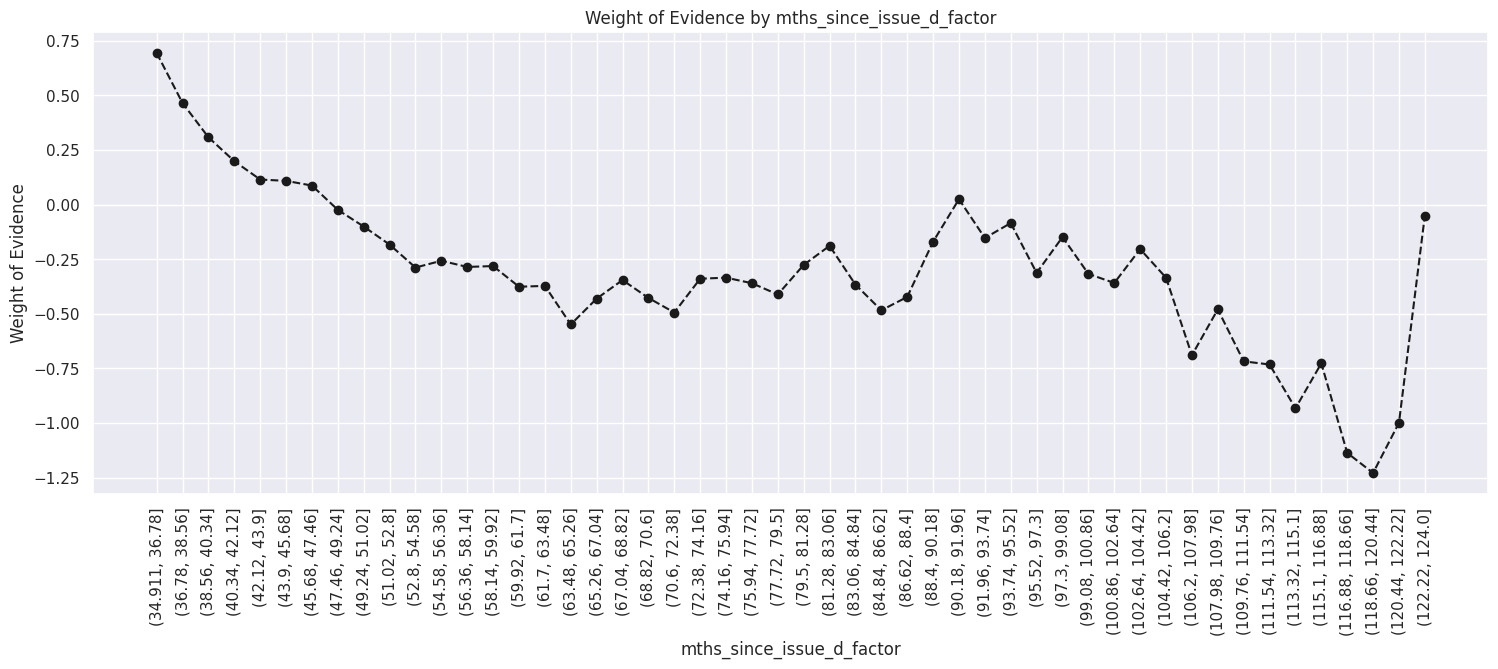

In [105]:
plot_by_woe(df_temp, 90)

In [107]:
# Creating dummy variables for the following categories
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
loan_data_inputs_train['mths_since_issue_d:<38'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_issue_d'] in range(38) else 0, axis = 1)
loan_data_inputs_train['mths_since_issue_d:38-39'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_issue_d'] in range(38, 40) else 0, axis = 1)
loan_data_inputs_train['mths_since_issue_d:40-41'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_issue_d'] in range(40, 42) else 0, axis = 1)
loan_data_inputs_train['mths_since_issue_d:42-48'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_issue_d'] in range(42, 49) else 0, axis = 1)
loan_data_inputs_train['mths_since_issue_d:49-52'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_issue_d'] in range(49, 53) else 0, axis = 1)
loan_data_inputs_train['mths_since_issue_d:53-64'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_issue_d'] in range(53, 65) else 0, axis = 1)
loan_data_inputs_train['mths_since_issue_d:65-84'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_issue_d'] in range(65, 85) else 0, axis = 1)
loan_data_inputs_train['mths_since_issue_d:>84'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_issue_d'] in range(85, int(loan_data_inputs_train['mths_since_issue_d'].max())) else 0, axis = 1)

In [165]:
# Creating dummy variables for the following categories
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
loan_data_inputs_test['mths_since_issue_d:<38'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_issue_d'] in range(38) else 0, axis = 1)
loan_data_inputs_test['mths_since_issue_d:38-39'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_issue_d'] in range(38, 40) else 0, axis = 1)
loan_data_inputs_test['mths_since_issue_d:40-41'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_issue_d'] in range(40, 42) else 0, axis = 1)
loan_data_inputs_test['mths_since_issue_d:42-48'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_issue_d'] in range(42, 49) else 0, axis = 1)
loan_data_inputs_test['mths_since_issue_d:49-52'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_issue_d'] in range(49, 53) else 0, axis = 1)
loan_data_inputs_test['mths_since_issue_d:53-64'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_issue_d'] in range(53, 65) else 0, axis = 1)
loan_data_inputs_test['mths_since_issue_d:65-84'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_issue_d'] in range(65, 85) else 0, axis = 1)
loan_data_inputs_test['mths_since_issue_d:>84'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_issue_d'] in range(85, int(loan_data_inputs_test['mths_since_issue_d'].max())) else 0, axis = 1)

### Preprocessing Continuous Variables: mths_since_earliest_cr_line_factor

In [108]:
# Calculating WoE for "mths_since_earliest_cr_line"
loan_data_inputs_train['mths_since_earliest_cr_line_factor'] = pd.cut(loan_data_inputs_train['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'mths_since_earliest_cr_line_factor', loan_data_targets_train)

df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.576, 11.52]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,NaN,NaN,0.016321
1,"(11.52, 23.04]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016321
2,"(23.04, 34.56]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016321
3,"(34.56, 46.08]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016321
4,"(46.08, 57.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016321
5,"(57.6, 69.12]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016321
6,"(69.12, 80.64]",722,0.898892,0.001936,649.0,73.0,0.001953,0.001790,0.087228,NaN,NaN,0.016321
7,"(80.64, 92.16]",2079,0.885522,0.005573,1841.0,238.0,0.005541,0.005836,-0.051951,0.013370,0.139180,0.016321
8,"(92.16, 103.68]",2667,0.855268,0.007150,2281.0,386.0,0.006865,0.009466,-0.321213,0.030254,0.269262,0.016321
9,"(103.68, 115.2]",5092,0.871170,0.013650,4436.0,656.0,0.013351,0.016087,-0.186397,0.015902,0.134816,0.016321


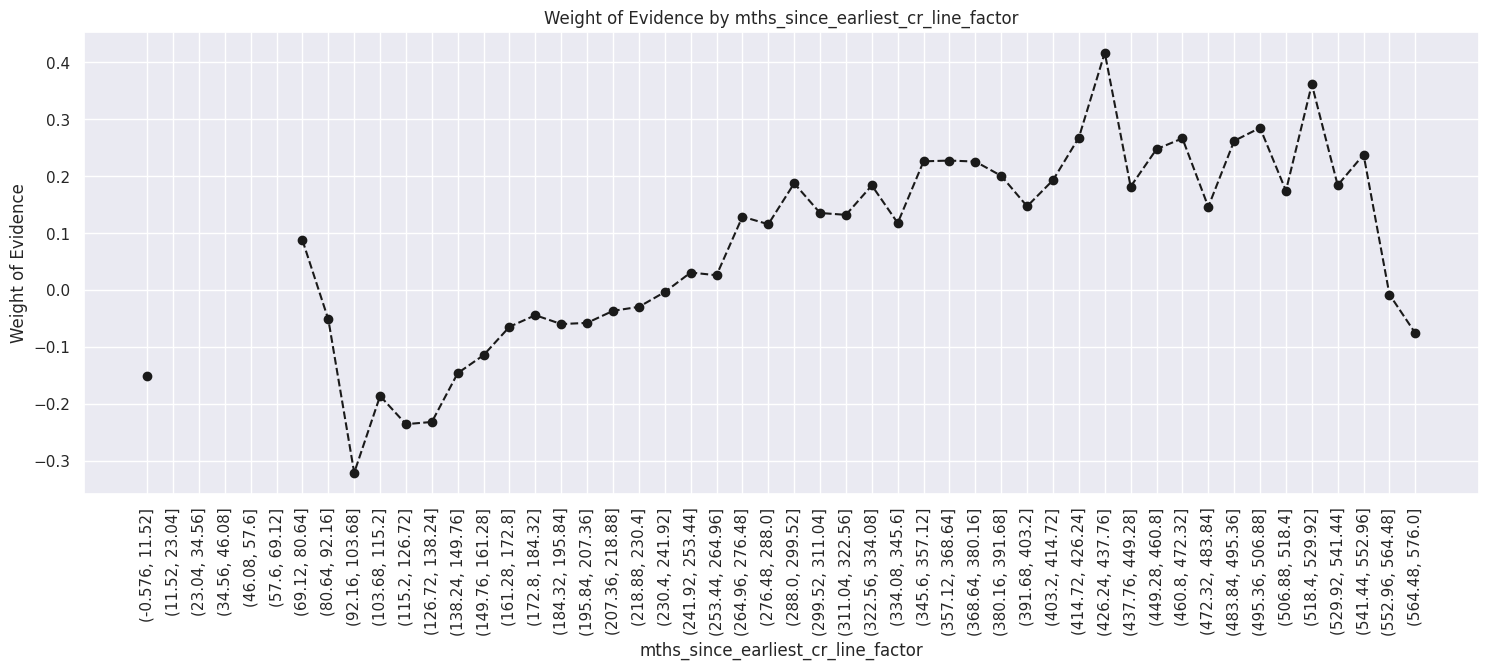

In [109]:
plot_by_woe(df_temp, 90)

In [111]:
# Creating the following categories
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
loan_data_inputs_train['mths_since_earliest_cr_line:<140'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(140) else 0, axis = 1)
loan_data_inputs_train['mths_since_earliest_cr_line:141-164'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(140, 165) else 0, axis = 1)
loan_data_inputs_train['mths_since_earliest_cr_line:165-247'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(165, 248) else 0, axis = 1)
loan_data_inputs_train['mths_since_earliest_cr_line:248-270'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(248, 271) else 0, axis = 1)
loan_data_inputs_train['mths_since_earliest_cr_line:271-352'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(271, 353) else 0, axis = 1)
loan_data_inputs_train['mths_since_earliest_cr_line:>352'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(353, int(loan_data_inputs_train['mths_since_earliest_cr_line'].max())) else 0, axis = 1)

In [166]:
# Creating the following categories
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
loan_data_inputs_test['mths_since_earliest_cr_line:<140'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(140) else 0, axis = 1)
loan_data_inputs_test['mths_since_earliest_cr_line:141-164'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(140, 165) else 0, axis = 1)
loan_data_inputs_test['mths_since_earliest_cr_line:165-247'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(165, 248) else 0, axis = 1)
loan_data_inputs_test['mths_since_earliest_cr_line:248-270'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(248, 271) else 0, axis = 1)
loan_data_inputs_test['mths_since_earliest_cr_line:271-352'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(271, 353) else 0, axis = 1)
loan_data_inputs_test['mths_since_earliest_cr_line:>352'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_earliest_cr_line'] in range(353, int(loan_data_inputs_test['mths_since_earliest_cr_line'].max())) else 0, axis = 1)

### Preprocessing Continuous Variables: delinq_2yrs

In [112]:
# Calculating "delinq_2yrs"
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'delinq_2yrs', loan_data_targets_train)
# We calculate weight of evidence.
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,NaN,NaN,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,0.002750,0.028520,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,0.004242,0.043724,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,0.005711,0.056616,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,0.015526,0.160180,inf
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.002796,-0.086357,0.016835,0.172819,inf
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.001202,0.124117,0.020208,0.210474,inf
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000956,-0.280668,0.041981,0.404785,inf
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000343,0.161037,0.045190,0.441705,inf
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.030882,0.017765,0.191920,inf


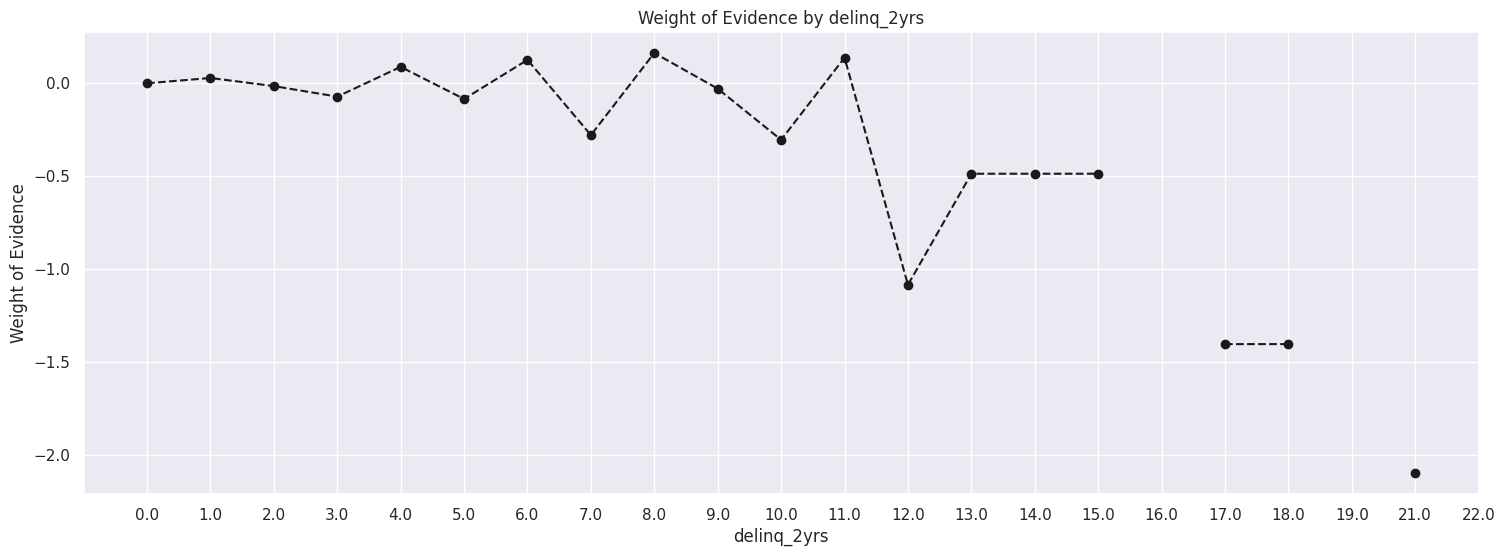

In [113]:
plot_by_woe(df_temp)

In [118]:
# Creating categories: 0, 1-3, >=4
loan_data_inputs_train['delinq_2yrs:0'] = loan_data_inputs_train.apply(lambda x: 1 if x['delinq_2yrs'] == 0 else 0, axis = 1)
loan_data_inputs_train['delinq_2yrs:1-3'] = loan_data_inputs_train.apply(lambda x: 1 if x['delinq_2yrs'] in range(1, 3) else 0, axis = 1)
loan_data_inputs_train['delinq_2yrs:>=4'] = loan_data_inputs_train.apply(lambda x: 1 if x['delinq_2yrs'] >= 9 else 0, axis = 1)

In [167]:
# Creating categories: 0, 1-3, >=4
loan_data_inputs_test['delinq_2yrs:0'] = loan_data_inputs_test.apply(lambda x: 1 if x['delinq_2yrs'] == 0 else 0, axis = 1)
loan_data_inputs_test['delinq_2yrs:1-3'] = loan_data_inputs_test.apply(lambda x: 1 if x['delinq_2yrs'] in range(1, 3) else 0, axis = 1)
loan_data_inputs_test['delinq_2yrs:>=4'] = loan_data_inputs_test.apply(lambda x: 1 if x['delinq_2yrs'] >= 9 else 0, axis = 1)

### Preprocessing Continuous Variables: inq_last_6mths

In [119]:
# Calculating "inq_last_6mths"
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'inq_last_6mths', loan_data_targets_train)

df_temp

/home/dmokroguz/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.434082,0.196450,NaN,NaN,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.293884,-0.057585,0.023446,0.254035,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.153907,-0.247150,0.020753,0.189564,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.078792,-0.441965,0.024526,0.194816,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.021605,-0.375911,0.008694,0.066054,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.009515,-0.547226,0.023376,0.171314,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.005076,-0.784073,0.036862,0.236848,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.001251,-1.347439,0.108882,0.563366,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000883,-1.506877,0.035681,0.159437,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000343,-1.369506,0.030854,0.137370,inf


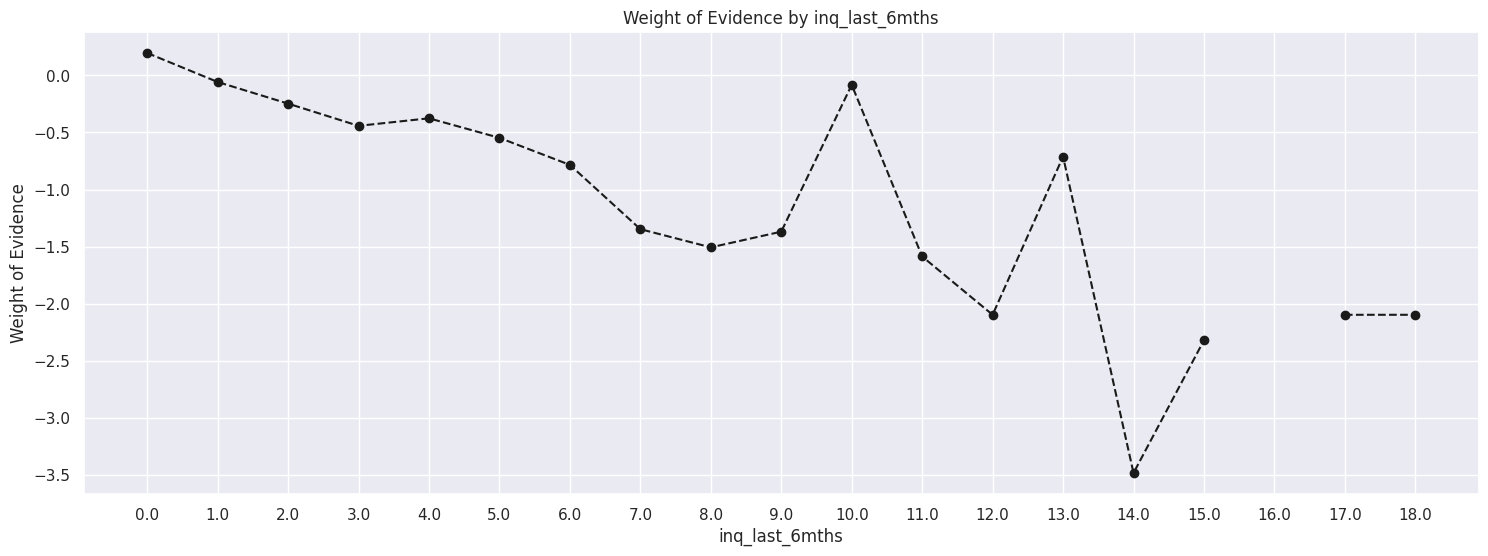

In [120]:
plot_by_woe(df_temp)

In [121]:
# Creating categories: 0, 1 - 2, 3 - 6, > 6
loan_data_inputs_train['inq_last_6mths:0'] = loan_data_inputs_train.apply(lambda x: 1 if x['inq_last_6mths'] == 0 else 0, axis = 1)
loan_data_inputs_train['inq_last_6mths:1-2'] = loan_data_inputs_train.apply(lambda x: 1 if x['inq_last_6mths'] in range(1, 3) else 0, axis = 1)
loan_data_inputs_train['inq_last_6mths:3-6'] = loan_data_inputs_train.apply(lambda x: 1 if x['inq_last_6mths'] in range(3, 6) else 0, axis = 1)
loan_data_inputs_train['inq_last_6mths:>6'] = loan_data_inputs_train.apply(lambda x: 1 if x['inq_last_6mths'] > 6 else 0, axis = 1)

In [168]:
# Creating categories: 0, 1 - 2, 3 - 6, > 6
loan_data_inputs_test['inq_last_6mths:0'] = loan_data_inputs_test.apply(lambda x: 1 if x['inq_last_6mths'] == 0 else 0, axis = 1)
loan_data_inputs_test['inq_last_6mths:1-2'] = loan_data_inputs_test.apply(lambda x: 1 if x['inq_last_6mths'] in range(1, 3) else 0, axis = 1)
loan_data_inputs_test['inq_last_6mths:3-6'] = loan_data_inputs_test.apply(lambda x: 1 if x['inq_last_6mths'] in range(3, 6) else 0, axis = 1)
loan_data_inputs_test['inq_last_6mths:>6'] = loan_data_inputs_test.apply(lambda x: 1 if x['inq_last_6mths'] > 6 else 0, axis = 1)

### Preprocessing Continuous Variables: open_acc

In [122]:
# Calculating for "open_acc"
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'open_acc', loan_data_targets_train)

df_temp

/home/dmokroguz/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000172,-0.952613,NaN,NaN,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000343,-0.172454,0.114107,0.780159,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.005518,-0.398263,0.027260,0.225809,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.013561,-0.163789,0.028220,0.234474,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.026681,0.008449,0.017817,0.172239,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
56,58.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
57,62.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
58,75.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
59,76.0,2,0.000000,0.000005,0.0,2.0,0.000000,0.000049,-inf,1.000000,inf,inf


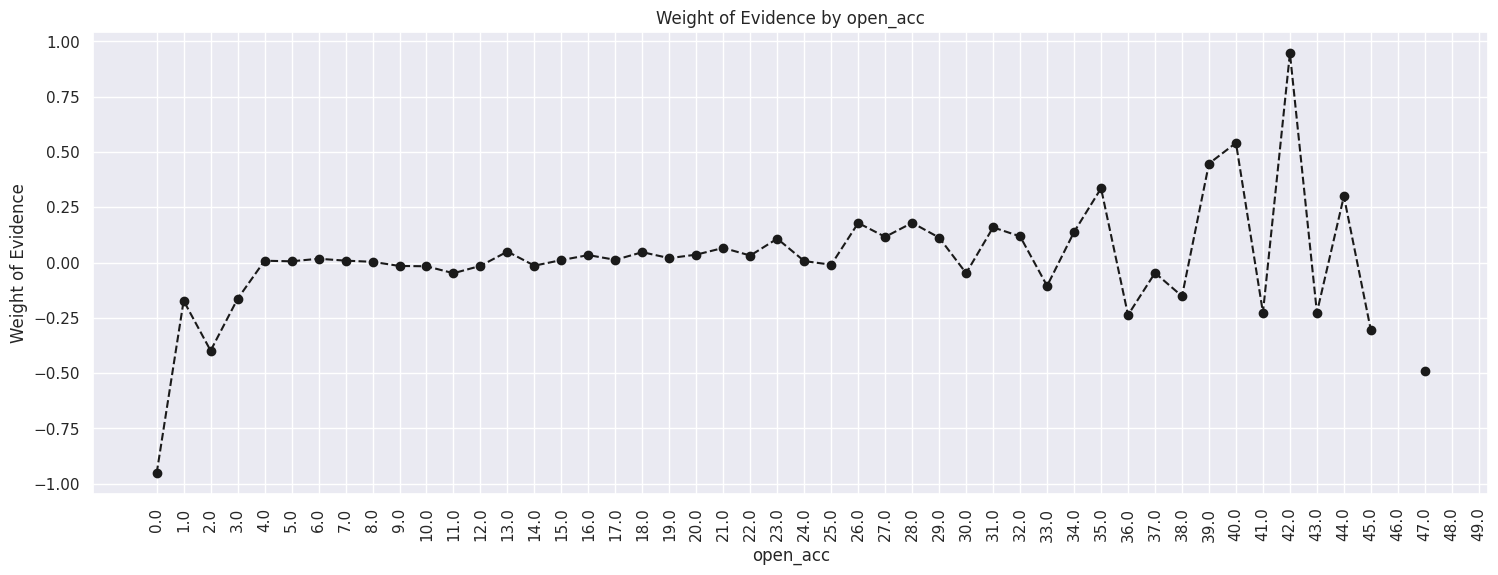

In [123]:
plot_by_woe(df_temp, 90)

In [125]:
# Creating categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
loan_data_inputs_train['open_acc:0'] = loan_data_inputs_train.apply(lambda x: 1 if x['open_acc'] == 0 else 0, axis = 1)
loan_data_inputs_train['open_acc:1-3'] = loan_data_inputs_train.apply(lambda x: 1 if x['open_acc'] in range(1, 4) else 0, axis = 1)
loan_data_inputs_train['open_acc:4-12'] = loan_data_inputs_train.apply(lambda x: 1 if x['open_acc'] in range(4, 13) else 0, axis = 1)
loan_data_inputs_train['open_acc:13-17'] = loan_data_inputs_train.apply(lambda x: 1 if x['open_acc'] in range(13, 18) else 0, axis = 1)
loan_data_inputs_train['open_acc:18-22'] = loan_data_inputs_train.apply(lambda x: 1 if x['open_acc'] in range(18, 23) else 0, axis = 1)
loan_data_inputs_train['open_acc:23-25'] = loan_data_inputs_train.apply(lambda x: 1 if x['open_acc'] in range(23, 26) else 0, axis = 1)
loan_data_inputs_train['open_acc:26-30'] = loan_data_inputs_train.apply(lambda x: 1 if x['open_acc'] in range(26, 31) else 0, axis = 1)
loan_data_inputs_train['open_acc:>=31'] = loan_data_inputs_train.apply(lambda x: 1 if x['open_acc'] >= 31 else 0, axis = 1)

In [169]:
# Creating categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
loan_data_inputs_test['open_acc:0'] = loan_data_inputs_test.apply(lambda x: 1 if x['open_acc'] == 0 else 0, axis = 1)
loan_data_inputs_test['open_acc:1-3'] = loan_data_inputs_test.apply(lambda x: 1 if x['open_acc'] in range(1, 4) else 0, axis = 1)
loan_data_inputs_test['open_acc:4-12'] = loan_data_inputs_test.apply(lambda x: 1 if x['open_acc'] in range(4, 13) else 0, axis = 1)
loan_data_inputs_test['open_acc:13-17'] = loan_data_inputs_test.apply(lambda x: 1 if x['open_acc'] in range(13, 18) else 0, axis = 1)
loan_data_inputs_test['open_acc:18-22'] = loan_data_inputs_test.apply(lambda x: 1 if x['open_acc'] in range(18, 23) else 0, axis = 1)
loan_data_inputs_test['open_acc:23-25'] = loan_data_inputs_test.apply(lambda x: 1 if x['open_acc'] in range(23, 26) else 0, axis = 1)
loan_data_inputs_test['open_acc:26-30'] = loan_data_inputs_test.apply(lambda x: 1 if x['open_acc'] in range(26, 31) else 0, axis = 1)
loan_data_inputs_test['open_acc:>=31'] = loan_data_inputs_test.apply(lambda x: 1 if x['open_acc'] >= 31 else 0, axis = 1)

### Preprocessing Continuous Variables: open_accpub_rec

In [126]:
# pub_rec
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'pub_rec', loan_data_targets_train)
# We calculate weight of evidence.
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.874467,-0.007606,NaN,NaN,inf
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.110771,0.028408,0.003478,0.036014,inf
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.010741,0.136092,0.009828,0.107684,inf
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.002501,0.348856,0.017065,0.212764,inf
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000760,0.400513,0.003707,0.051657,inf
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000441,0.232239,0.012690,0.168274,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000196,0.514161,0.020294,0.281922,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000049,1.037749,0.026709,0.523588,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,0.041667,inf,inf
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000074,-0.798462,0.214286,inf,inf


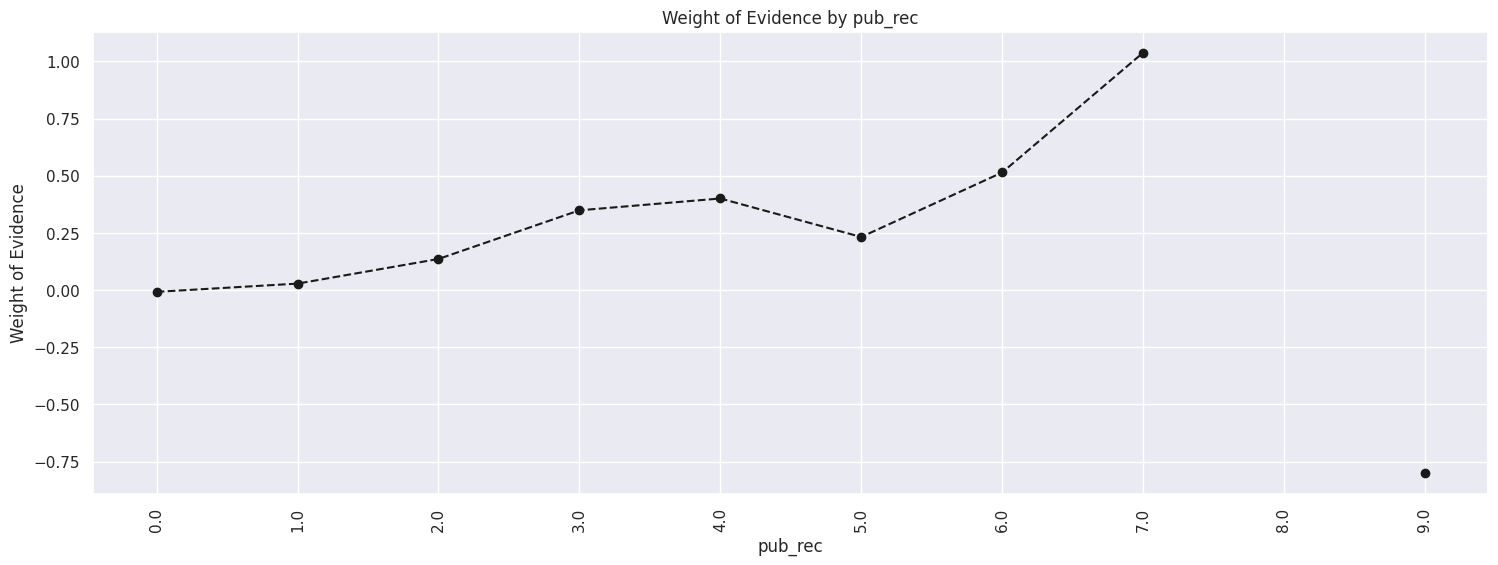

In [127]:
plot_by_woe(df_temp, 90)

In [128]:
# Creating categories '0-2', '3-4', '>=5'
loan_data_inputs_train['pub_rec:0-2'] = loan_data_inputs_train.apply(lambda x: 1 if x['pub_rec'] in range(0, 3) else 0, axis = 1)
loan_data_inputs_train['pub_rec:3-4'] = loan_data_inputs_train.apply(lambda x: 1 if x['pub_rec'] in range(3, 5) else 0, axis = 1)
loan_data_inputs_train['pub_rec:>=5'] = loan_data_inputs_train.apply(lambda x: 1 if x['pub_rec'] >= 5 else 0, axis = 1)

In [170]:
# Creating categories '0-2', '3-4', '>=5'
loan_data_inputs_test['pub_rec:0-2'] = loan_data_inputs_test.apply(lambda x: 1 if x['pub_rec'] in range(0, 3) else 0, axis = 1)
loan_data_inputs_test['pub_rec:3-4'] = loan_data_inputs_test.apply(lambda x: 1 if x['pub_rec'] in range(3, 5) else 0, axis = 1)
loan_data_inputs_test['pub_rec:>=5'] = loan_data_inputs_test.apply(lambda x: 1 if x['pub_rec'] >= 5 else 0, axis = 1)

### Preprocessing Continuous Variables: total_acc

In [129]:
# Calculating for "total_acc"
loan_data_inputs_train['total_acc_factor'] = pd.cut(loan_data_inputs_train['total_acc'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'total_acc_factor', loan_data_targets_train)

df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",459,0.810458,0.001230,372.0,87.0,0.001120,0.002134,-0.644759,NaN,NaN,inf
1,"(3.0, 6.0]",6004,0.864757,0.016095,5192.0,812.0,0.015627,0.019913,-0.242371,0.054299,0.402388,inf
2,"(6.0, 9.0]",15047,0.873131,0.040337,13138.0,1909.0,0.039543,0.046814,-0.168816,0.008374,0.073555,inf
3,"(9.0, 12.0]",25169,0.881283,0.067472,22181.0,2988.0,0.066760,0.073275,-0.093113,0.008152,0.075703,inf
4,"(12.0, 15.0]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.097969,-0.093124,0.000001,0.000011,inf
5,"(15.0, 18.0]",38711,0.887267,0.103775,34347.0,4364.0,0.103377,0.107018,-0.034619,0.005986,0.058505,inf
6,"(18.0, 21.0]",40599,0.886155,0.108836,35977.0,4622.0,0.108283,0.113345,-0.045693,0.001112,0.011073,inf
7,"(21.0, 24.0]",40163,0.891492,0.107668,35805.0,4358.0,0.107765,0.106871,0.008329,0.005337,0.054022,inf
8,"(24.0, 27.0]",36286,0.895442,0.097274,32492.0,3794.0,0.097794,0.093040,0.049828,0.003950,0.041499,inf
9,"(27.0, 30.0]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.078621,0.089553,0.003661,0.039725,inf


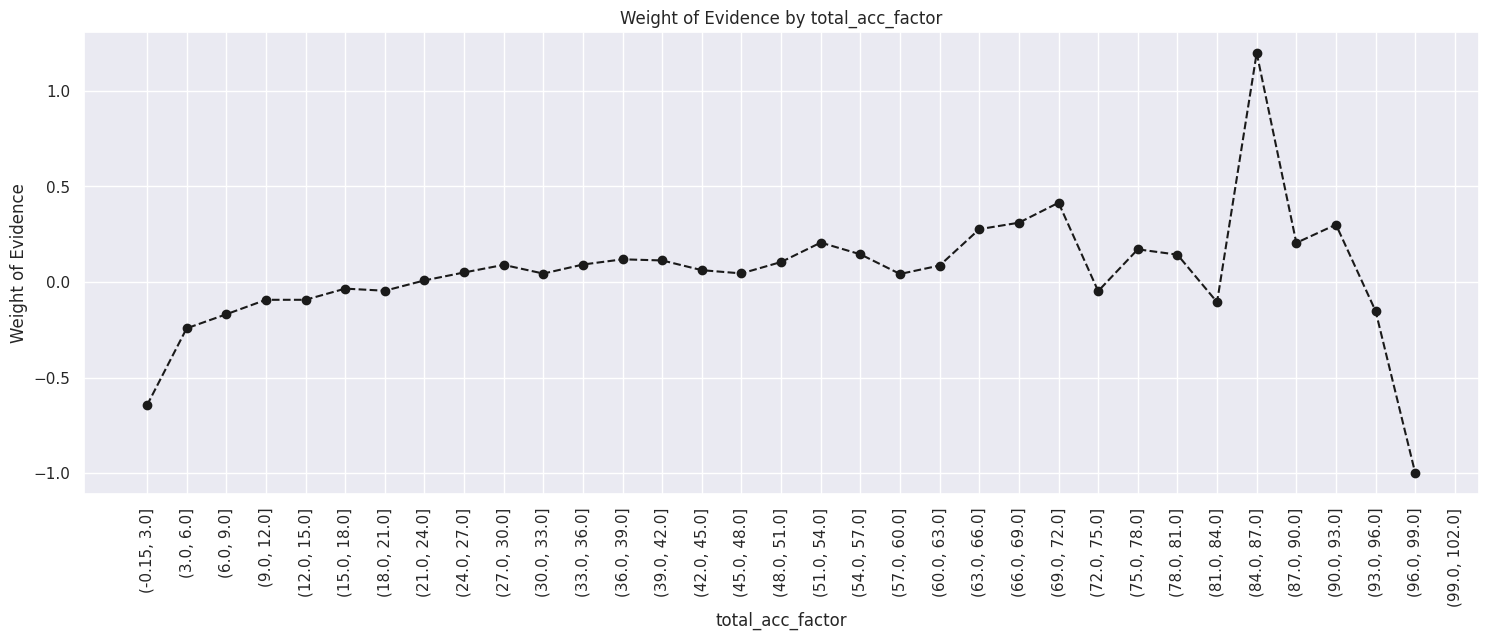

In [130]:
plot_by_woe(df_temp, 90)

In [131]:
# Calculating categories: '<=27', '28-51', '>51'
loan_data_inputs_train['total_acc:<=27'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_acc'] <= 27 else 0, axis = 1)
loan_data_inputs_train['total_acc:28-51'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_acc'] in range(28, 52) else 0, axis = 1)
loan_data_inputs_train['total_acc:>=52'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_acc'] >= 52 else 0, axis = 1)

In [171]:
# Calculating categories: '<=27', '28-51', '>51'
loan_data_inputs_test['total_acc:<=27'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_acc'] <= 27 else 0, axis = 1)
loan_data_inputs_test['total_acc:28-51'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_acc'] in range(28, 52) else 0, axis = 1)
loan_data_inputs_test['total_acc:>=52'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_acc'] >= 52 else 0, axis = 1)

### Preprocessing Continuous Variables: acc_now_delinq

In [132]:
# Calculating "acc_now_delinq"
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'acc_now_delinq', loan_data_targets_train)

df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.996714,-0.000363,NaN,NaN,inf
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.003114,0.093337,0.008797,0.093700,inf
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000123,0.467204,0.029126,0.373868,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.305986,0.071429,0.773190,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,0.500000,inf,inf


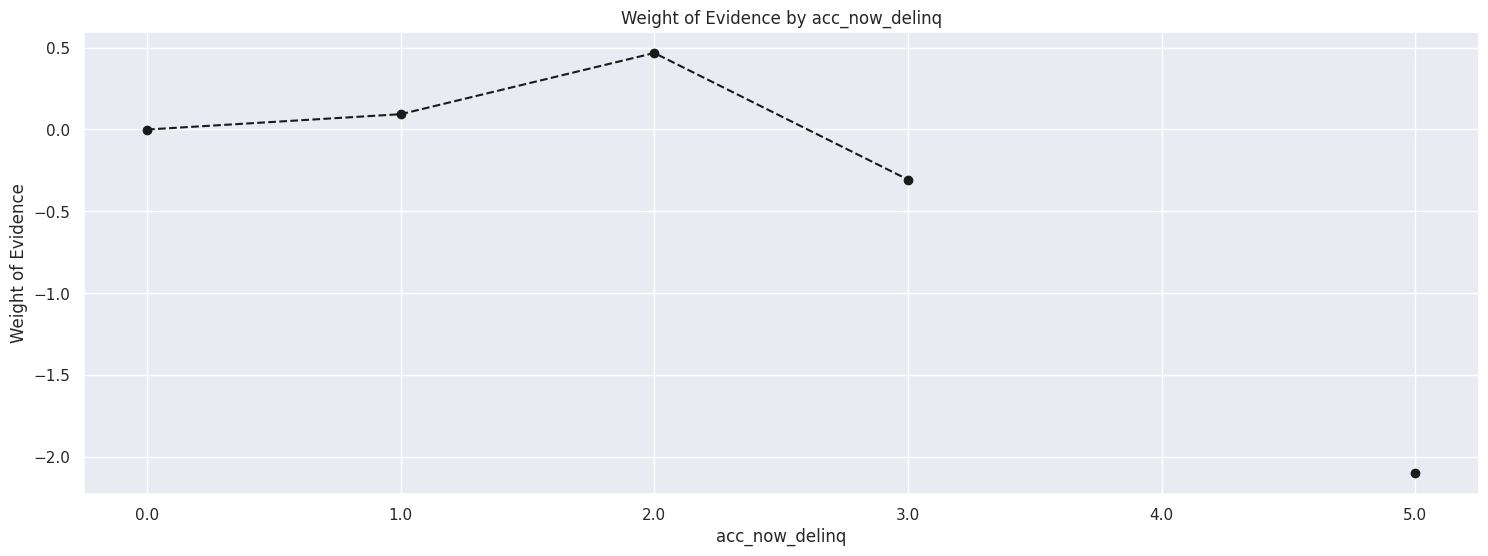

In [133]:
plot_by_woe(df_temp)

In [134]:
# Categories: '0', '>=1'
loan_data_inputs_train['acc_now_delinq:0'] = loan_data_inputs_train.apply(lambda x: 1 if x['acc_now_delinq'] == 0 else 0, axis = 1)
loan_data_inputs_train['acc_now_delinq:>=1'] = loan_data_inputs_train.apply(lambda x: 1 if x['acc_now_delinq'] >= 1 else 0, axis = 1)

In [172]:
# Categories: '0', '>=1'
loan_data_inputs_test['acc_now_delinq:0'] = loan_data_inputs_test.apply(lambda x: 1 if x['acc_now_delinq'] == 0 else 0, axis = 1)
loan_data_inputs_test['acc_now_delinq:>=1'] = loan_data_inputs_test.apply(lambda x: 1 if x['acc_now_delinq'] >= 1 else 0, axis = 1)

In [135]:
# Calculating "total_rev_hi_lim"
loan_data_inputs_train['total_rev_hi_lim_factor'] = pd.cut(loan_data_inputs_train['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'total_rev_hi_lim_factor', loan_data_targets_train)

df_temp

/home/dmokroguz/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",19417,0.866457,0.052052,16824.0,2593.0,0.050637,0.063588,-0.227754,NaN,NaN,inf
1,"(5000.0, 9999.999]",52655,0.876194,0.141156,46136.0,6519.0,0.138859,0.159866,-0.140872,0.009737,0.086882,inf
2,"(9999.999, 14999.998]",59570,0.880376,0.159693,52444.0,7126.0,0.157845,0.174751,-0.101749,0.004182,0.039123,inf
3,"(14999.998, 19999.998]",51455,0.877582,0.137939,45156.0,6299.0,0.135910,0.154471,-0.128013,0.002794,0.026264,inf
4,"(19999.998, 24999.997]",41582,0.885792,0.111472,36833.0,4749.0,0.110859,0.116460,-0.049285,0.008210,0.078728,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


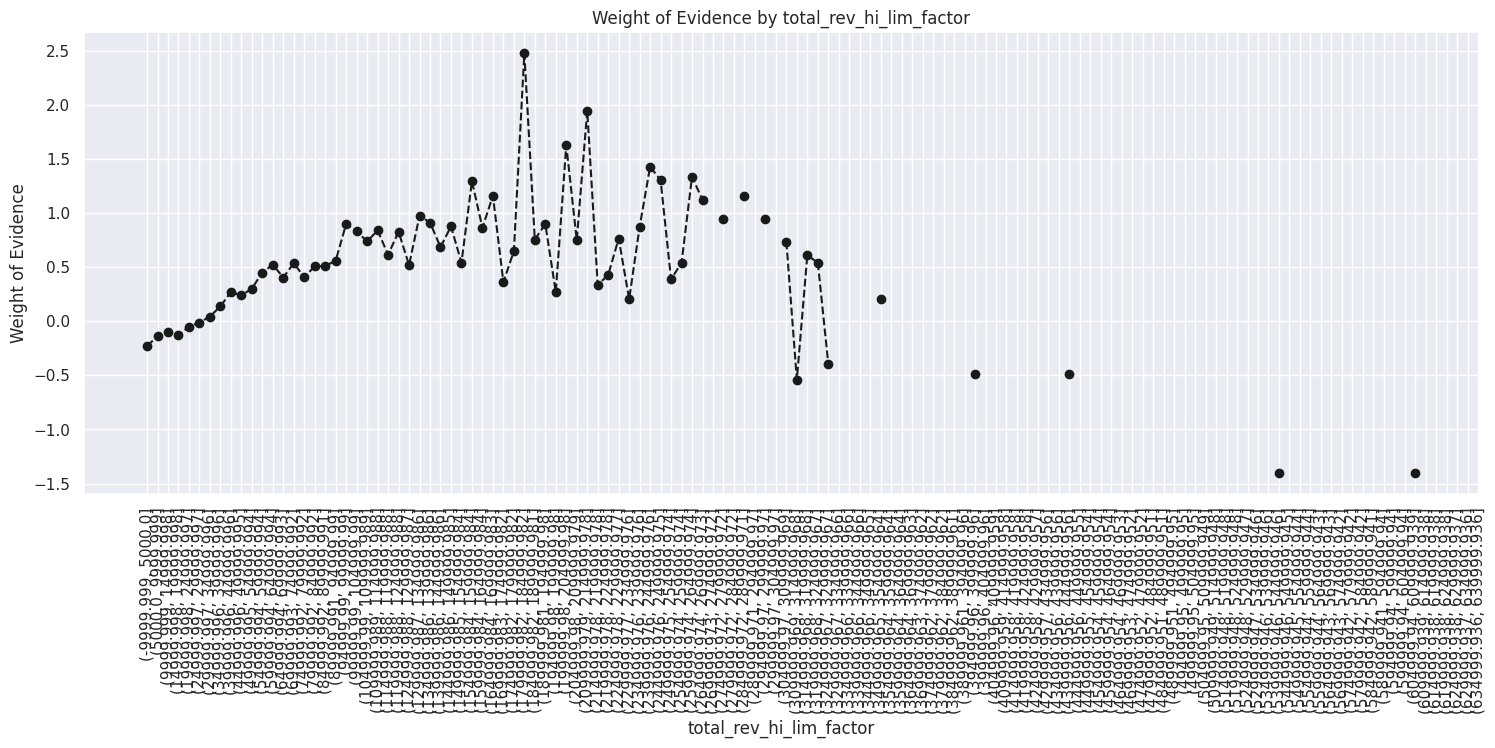

In [136]:
plot_by_woe(df_temp, 90)

In [137]:
# Creating categories:
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
loan_data_inputs_train['total_rev_hi_lim:<=5K'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_rev_hi_lim'] <= 5000 else 0, axis = 1)
loan_data_inputs_train['total_rev_hi_lim:5K-10K'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(4999, 10001) else 0, axis = 1)
loan_data_inputs_train['total_rev_hi_lim:10K-20K'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(10001, 20001) else 0, axis = 1)
loan_data_inputs_train['total_rev_hi_lim:20K-30K'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(20001, 30001) else 0, axis = 1)
loan_data_inputs_train['total_rev_hi_lim:30K-40K'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(30001, 40001) else 0, axis = 1)
loan_data_inputs_train['total_rev_hi_lim:40K-55K'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(40001, 55001) else 0, axis = 1)
loan_data_inputs_train['total_rev_hi_lim:55K-95K'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(55001, 95001) else 0, axis = 1)
loan_data_inputs_train['total_rev_hi_lim:>95K'] = loan_data_inputs_train.apply(lambda x: 1 if x['total_rev_hi_lim'] > 95000 else 0, axis = 1)

In [173]:
# Creating categories:
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
loan_data_inputs_test['total_rev_hi_lim:<=5K'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_rev_hi_lim'] <= 5000 else 0, axis = 1)
loan_data_inputs_test['total_rev_hi_lim:5K-10K'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(4999, 10001) else 0, axis = 1)
loan_data_inputs_test['total_rev_hi_lim:10K-20K'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(10001, 20001) else 0, axis = 1)
loan_data_inputs_test['total_rev_hi_lim:20K-30K'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(20001, 30001) else 0, axis = 1)
loan_data_inputs_test['total_rev_hi_lim:30K-40K'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(30001, 40001) else 0, axis = 1)
loan_data_inputs_test['total_rev_hi_lim:40K-55K'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(40001, 55001) else 0, axis = 1)
loan_data_inputs_test['total_rev_hi_lim:55K-95K'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_rev_hi_lim'] in range(55001, 95001) else 0, axis = 1)
loan_data_inputs_test['total_rev_hi_lim:>95K'] = loan_data_inputs_test.apply(lambda x: 1 if x['total_rev_hi_lim'] > 95000 else 0, axis = 1)

### Preprocessing Continuous Variables: installment_factor

In [138]:
# Calcuilating WoE for "installment_factor"
loan_data_inputs_train['installment_factor'] = pd.cut(loan_data_inputs_train['installment'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'installment_factor', loan_data_targets_train)

df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1812,0.906181,0.004858,1642.0,170.0,0.004942,0.004169,0.170127,NaN,NaN,0.013497
1,"(43.556, 71.443]",4841,0.897542,0.012978,4345.0,496.0,0.013078,0.012163,0.072460,0.008639,0.097667,0.013497
2,"(71.443, 99.329]",6824,0.893025,0.018294,6094.0,730.0,0.018342,0.017902,0.024270,0.004517,0.048190,0.013497
3,"(99.329, 127.216]",9138,0.890348,0.024497,8136.0,1002.0,0.024488,0.024572,-0.003444,0.002677,0.027715,0.013497
4,"(127.216, 155.102]",10040,0.896514,0.026915,9001.0,1039.0,0.027091,0.025479,0.061332,0.006166,0.064776,0.013497
5,"(155.102, 182.988]",16816,0.894208,0.045080,15037.0,1779.0,0.045258,0.043626,0.036717,0.002306,0.024615,0.013497
6,"(182.988, 210.875]",17216,0.904798,0.046152,15577.0,1639.0,0.046883,0.040193,0.153964,0.010590,0.117247,0.013497
7,"(210.875, 238.761]",15090,0.900398,0.040453,13587.0,1503.0,0.040894,0.036858,0.103905,0.004400,0.050059,0.013497
8,"(238.761, 266.648]",18842,0.901391,0.050511,16984.0,1858.0,0.051118,0.045564,0.115026,0.000993,0.011121,0.013497
9,"(266.648, 294.534]",20100,0.891095,0.053883,17911.0,2189.0,0.053908,0.053681,0.004225,0.010296,0.110801,0.013497


In [174]:
loan_data_inputs_test['installment_factor'] = pd.cut(loan_data_inputs_train['installment'], 50)

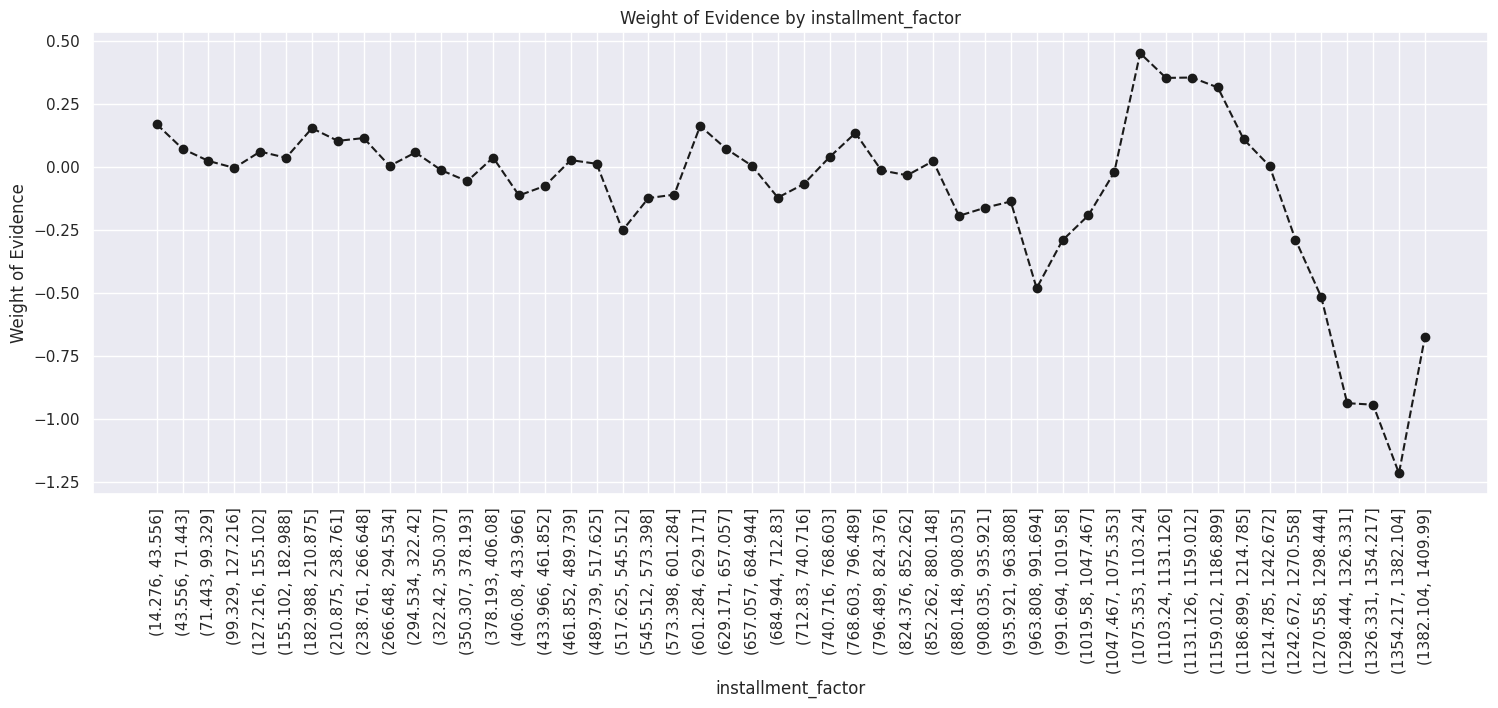

In [139]:
plot_by_woe(df_temp, 90)

### Preprocessing Continuous Variables: Annual income

In [140]:
# Calculating WoE for "annual_inc"
loan_data_inputs_train['annual_inc_factor'] = pd.cut(loan_data_inputs_train['annual_inc'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'annual_inc_factor', loan_data_targets_train)

df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 144693.64]",351904,0.888566,0.943372,312690.0,39214.0,0.941129,0.961646,-0.021567,NaN,NaN,inf
1,"(144693.64, 287491.28]",19004,0.925437,0.050945,17587.0,1417.0,0.052933,0.034749,0.420873,0.036871,0.442440,inf
2,"(287491.28, 430288.92]",1525,0.930492,0.004088,1419.0,106.0,0.004271,0.002599,0.496524,0.005055,0.075651,inf
3,"(430288.92, 573086.56]",332,0.939759,0.000890,312.0,20.0,0.000939,0.000490,0.649526,0.009267,0.153002,inf
4,"(573086.56, 715884.2]",112,0.883929,0.000300,99.0,13.0,0.000298,0.000319,-0.067574,0.055830,0.717100,inf
5,"(715884.2, 858681.84]",65,0.892308,0.000174,58.0,7.0,0.000175,0.000172,0.016788,0.008379,0.084362,inf
6,"(858681.84, 1001479.48]",39,0.974359,0.000105,38.0,1.0,0.000114,0.000025,1.539841,0.082051,1.523053,inf
7,"(1001479.48, 1144277.12]",10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,0.025641,inf,inf
8,"(1144277.12, 1287074.76]",12,1.000000,0.000032,12.0,0.0,0.000036,0.000000,inf,0.000000,NaN,inf
9,"(1287074.76, 1429872.4]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,0.000000,NaN,inf


In [141]:
# There are too few observations above 140k/year. Let's exclude them for the time being
loan_data_inputs_train_temp = loan_data_inputs_train[loan_data_inputs_train['annual_inc'] <= 140000]
loan_data_inputs_train_temp["annual_inc_factor"] = pd.cut(loan_data_inputs_train_temp['annual_inc'], 50)

df_temp = woe_ordered_continuous(loan_data_inputs_train_temp, 'annual_inc_factor', loan_data_targets_train[loan_data_inputs_train_temp.index])
df_temp

/tmp/ipykernel_72725/1184985031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_inputs_train_temp["annual_inc_factor"] = pd.cut(loan_data_inputs_train_temp['annual_inc'], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000043,12.0,3.0,0.000038,0.000077,-0.689458,NaN,NaN,0.049818
1,"(4658.08, 7420.16]",40,0.750000,0.000114,30.0,10.0,0.000096,0.000256,-0.977140,0.050000,0.287682,0.049818
2,"(7420.16, 10182.24]",287,0.874564,0.000818,251.0,36.0,0.000805,0.000920,-0.133818,0.124564,0.843322,0.049818
3,"(10182.24, 12944.32]",547,0.828154,0.001558,453.0,94.0,0.001452,0.002402,-0.503155,0.046411,0.369337,0.049818
4,"(12944.32, 15706.4]",1210,0.830579,0.003447,1005.0,205.0,0.003222,0.005238,-0.486019,0.002425,0.017135,0.049818
5,"(15706.4, 18468.48]",1522,0.847569,0.004335,1290.0,232.0,0.004136,0.005928,-0.360092,0.016990,0.125927,0.049818
6,"(18468.48, 21230.56]",2928,0.855533,0.008340,2505.0,423.0,0.008031,0.010809,-0.297080,0.007964,0.063012,0.049818
7,"(21230.56, 23992.64]",2495,0.844489,0.007107,2107.0,388.0,0.006755,0.009914,-0.383737,0.011044,0.086657,0.049818
8,"(23992.64, 26754.72]",7016,0.848632,0.019985,5954.0,1062.0,0.019088,0.027137,-0.351843,0.004143,0.031894,0.049818
9,"(26754.72, 29516.8]",5643,0.857345,0.016074,4838.0,805.0,0.015510,0.020570,-0.282338,0.008714,0.069505,0.049818


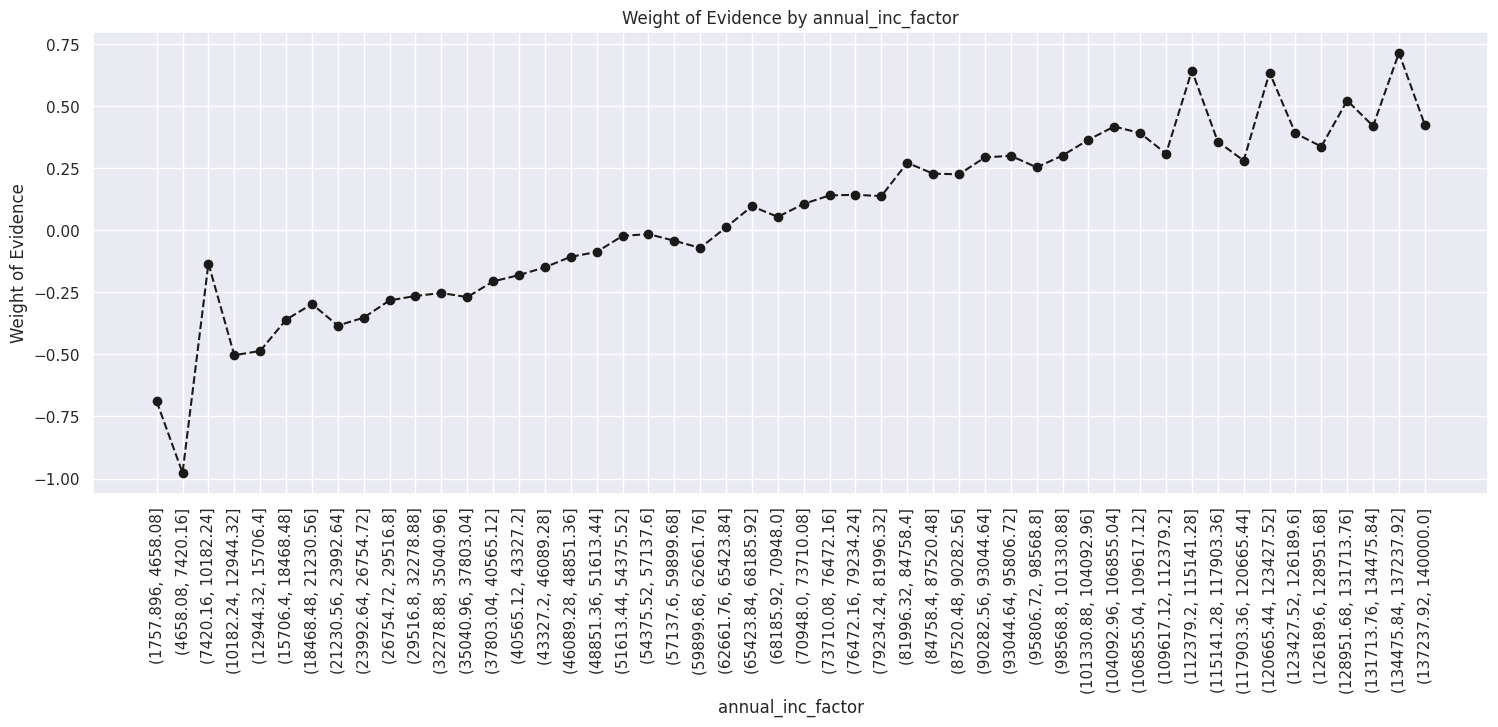

In [142]:
plot_by_woe(df_temp, 90)

In [144]:
# Splitting income in 10 equal categories
loan_data_inputs_train['annual_inc:<20K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] <= 20000 else 0, axis = 1)
loan_data_inputs_train['annual_inc:20K-30K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(20001, 30001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:30K-40K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(30001, 40001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:40K-50K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(40001, 50001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:50K-60K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(50001, 60001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:60K-70K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(60001, 70001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:70K-80K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(70001, 80001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:80K-90K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(80001, 90001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:90K-100K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(90001, 100001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:100K-120K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(100001, 120001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:120K-140K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] in range(120001, 140001) else 0, axis = 1)
loan_data_inputs_train['annual_inc:>140K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] > 140000 else 0, axis = 1)

/tmp/ipykernel_72725/3896820847.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train['annual_inc:>140K'] = loan_data_inputs_train.apply(lambda x: 1 if x['annual_inc'] > 140000 else 0, axis = 1)


In [175]:
# Splitting income in 10 equal categories
loan_data_inputs_test['annual_inc:<20K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] <= 20000 else 0, axis = 1)
loan_data_inputs_test['annual_inc:20K-30K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(20001, 30001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:30K-40K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(30001, 40001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:40K-50K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(40001, 50001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:50K-60K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(50001, 60001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:60K-70K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(60001, 70001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:70K-80K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(70001, 80001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:80K-90K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(80001, 90001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:90K-100K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(90001, 100001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:100K-120K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(100001, 120001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:120K-140K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] in range(120001, 140001) else 0, axis = 1)
loan_data_inputs_test['annual_inc:>140K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] > 140000 else 0, axis = 1)

/tmp/ipykernel_72725/3134963199.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_test['annual_inc:>140K'] = loan_data_inputs_test.apply(lambda x: 1 if x['annual_inc'] > 140000 else 0, axis = 1)


### Preprocessing Continuous Variables: mths_since_last_delinq

In [146]:
# Calculating WoE for "mths_since_last_delinq"
loan_data_inputs_train_temp = loan_data_inputs_train[pd.notnull(loan_data_inputs_train['mths_since_last_delinq'])]
loan_data_inputs_train_temp['mths_since_last_delinq_factor'] = pd.cut(loan_data_inputs_train_temp['mths_since_last_delinq'], 50)

df_temp = woe_ordered_continuous(loan_data_inputs_train_temp, 'mths_since_last_delinq_factor', loan_data_targets_train[loan_data_inputs_train_temp.index])
df_temp

/tmp/ipykernel_72725/3458215112.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train_temp['mths_since_last_delinq_factor'] = pd.cut(loan_data_inputs_train_temp['mths_since_last_delinq'], 50)
/tmp/ipykernel_72725/3458215112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_inputs_train_temp['mths_since_last_delinq_factor'] = pd.cut(loan_data_inputs_train_temp['mths_since_last_delinq'], 50)


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5277,0.871518,0.030531,4599.0,678.0,0.029814,0.036481,-0.201825,NaN,NaN,inf
1,"(3.76, 7.52]",11167,0.887615,0.064608,9912.0,1255.0,0.064256,0.067528,-0.049661,0.016097,0.152164,inf
2,"(7.52, 11.28]",13306,0.892830,0.076983,11880.0,1426.0,0.077014,0.076729,0.003711,0.005215,0.053372,inf
3,"(11.28, 15.04]",13216,0.888847,0.076462,11747.0,1469.0,0.076152,0.079042,-0.037256,0.003983,0.040967,inf
4,"(15.04, 18.8]",9337,0.894934,0.054020,8356.0,981.0,0.054169,0.052785,0.025891,0.006087,0.063147,inf
5,"(18.8, 22.56]",11641,0.892707,0.067350,10392.0,1249.0,0.067368,0.067205,0.002421,0.002227,0.023470,inf
6,"(22.56, 26.32]",10887,0.896298,0.062988,9758.0,1129.0,0.063258,0.060748,0.040483,0.003592,0.038062,inf
7,"(26.32, 30.08]",10560,0.895076,0.061096,9452.0,1108.0,0.061274,0.059618,0.027398,0.001223,0.013085,inf
8,"(30.08, 33.84]",7576,0.902191,0.043832,6835.0,741.0,0.044309,0.039871,0.105539,0.007115,0.078141,inf
9,"(33.84, 37.6]",9795,0.897397,0.056670,8790.0,1005.0,0.056982,0.054076,0.052355,0.004794,0.053184,inf


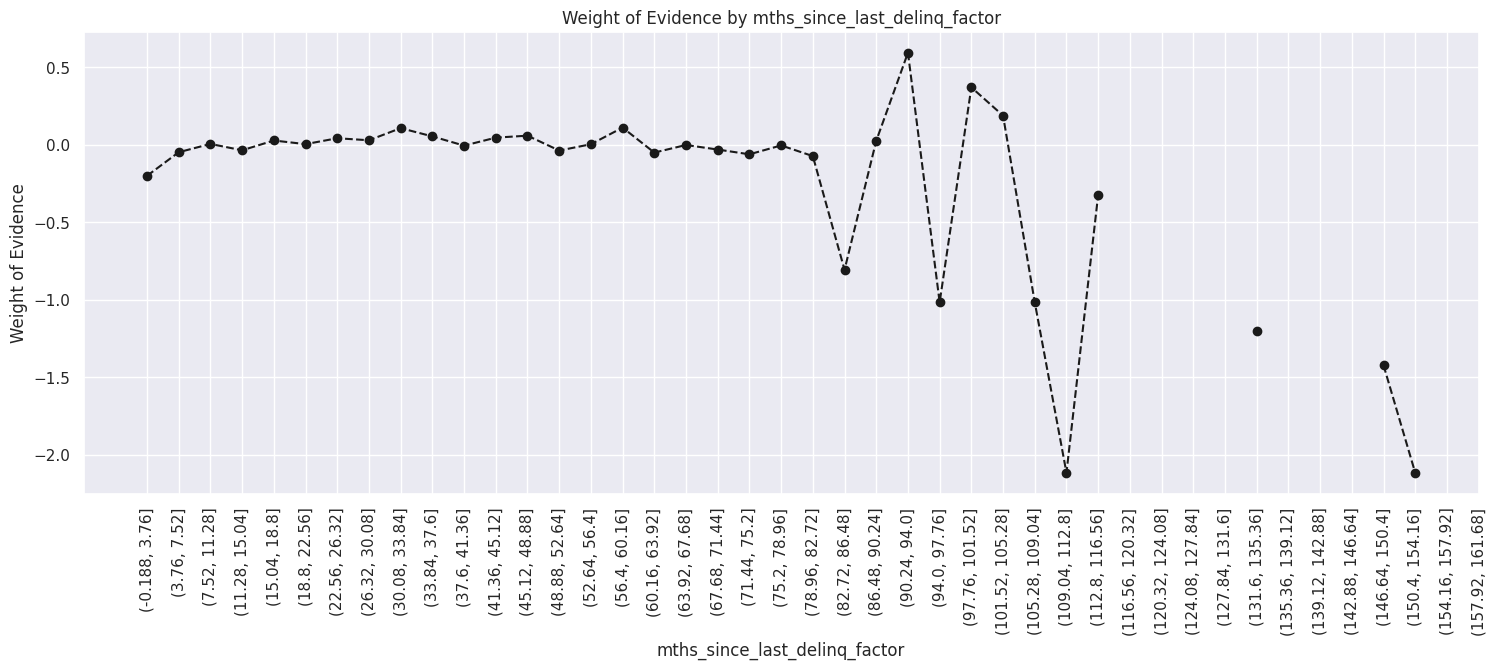

In [147]:
plot_by_woe(df_temp, 90)

In [149]:
# Creating categories: Missing, 0-3, 4-30, 31-56, >=57
loan_data_inputs_train['mths_since_last_delinq:Missing'] = loan_data_inputs_train.apply(lambda x: 1 if pd.isna(x['mths_since_last_delinq']) else 0, axis = 1)
loan_data_inputs_train['mths_since_last_delinq:0-3'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_last_delinq'] in range (0, 4) else 0, axis = 1)
loan_data_inputs_train['mths_since_last_delinq:4-30'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_last_delinq'] in range (4, 31) else 0, axis = 1)
loan_data_inputs_train['mths_since_last_delinq:31-56'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_last_delinq'] in range (31, 57) else 0, axis = 1)
loan_data_inputs_train['mths_since_last_delinq:>=57'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_last_delinq'] >= 57 else 0, axis = 1)

/tmp/ipykernel_72725/336425209.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train['mths_since_last_delinq:Missing'] = loan_data_inputs_train.apply(lambda x: 1 if pd.isna(x['mths_since_last_delinq']) else 0, axis = 1)
/tmp/ipykernel_72725/336425209.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train['mths_since_last_delinq:0-3'] = loan_data_inputs_train.apply(lambda x: 1 if x['mths_since_last_delinq'] in range (0, 4) else 0, axis = 1)
/tmp/ipykernel_72725/336425209.py:4: PerformanceW

In [176]:
# Creating categories: Missing, 0-3, 4-30, 31-56, >=57
loan_data_inputs_test['mths_since_last_delinq:Missing'] = loan_data_inputs_test.apply(lambda x: 1 if pd.isna(x['mths_since_last_delinq']) else 0, axis = 1)
loan_data_inputs_test['mths_since_last_delinq:0-3'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_last_delinq'] in range (0, 4) else 0, axis = 1)
loan_data_inputs_test['mths_since_last_delinq:4-30'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_last_delinq'] in range (4, 31) else 0, axis = 1)
loan_data_inputs_test['mths_since_last_delinq:31-56'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_last_delinq'] in range (31, 57) else 0, axis = 1)
loan_data_inputs_test['mths_since_last_delinq:>=57'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_last_delinq'] >= 57 else 0, axis = 1)

/tmp/ipykernel_72725/269222138.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_test['mths_since_last_delinq:Missing'] = loan_data_inputs_test.apply(lambda x: 1 if pd.isna(x['mths_since_last_delinq']) else 0, axis = 1)
/tmp/ipykernel_72725/269222138.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_test['mths_since_last_delinq:0-3'] = loan_data_inputs_test.apply(lambda x: 1 if x['mths_since_last_delinq'] in range (0, 4) else 0, axis = 1)
/tmp/ipykernel_72725/269222138.py:4: PerformanceWarni

### Preprocessing Continuous Variables: DTI

In [150]:
# Calculating WoE for "dti"
loan_data_inputs_train['dti_factor'] = pd.cut(loan_data_inputs_train['dti'], 100)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'dti_factor', loan_data_targets_train)

df_temp

/tmp/ipykernel_72725/383255205.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train['dti_factor'] = pd.cut(loan_data_inputs_train['dti'], 100)


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",745,0.876510,0.001997,653.0,92.0,0.001965,0.002256,-0.137956,NaN,NaN,0.028446
1,"(0.4, 0.8]",808,0.919554,0.002166,743.0,65.0,0.002236,0.001594,0.338564,0.043044,0.476520,0.028446
2,"(0.8, 1.2]",922,0.896963,0.002472,827.0,95.0,0.002489,0.002330,0.066183,0.022591,0.272381,0.028446
3,"(1.2, 1.6]",1043,0.896453,0.002796,935.0,108.0,0.002814,0.002648,0.060670,0.000511,0.005513,0.028446
4,"(1.6, 2.0]",1172,0.902730,0.003142,1058.0,114.0,0.003184,0.002796,0.130192,0.006278,0.069522,0.028446
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(37.991, 38.39]",202,0.856436,0.000542,173.0,29.0,0.000521,0.000711,-0.311749,0.060231,0.611900,0.028446
96,"(38.39, 38.79]",193,0.880829,0.000517,170.0,23.0,0.000512,0.000564,-0.097441,0.024393,0.214308,0.028446
97,"(38.79, 39.19]",192,0.869792,0.000515,167.0,25.0,0.000503,0.000613,-0.198627,0.011037,0.101186,0.028446
98,"(39.19, 39.59]",183,0.918033,0.000491,168.0,15.0,0.000506,0.000368,0.318169,0.048241,0.516796,0.028446


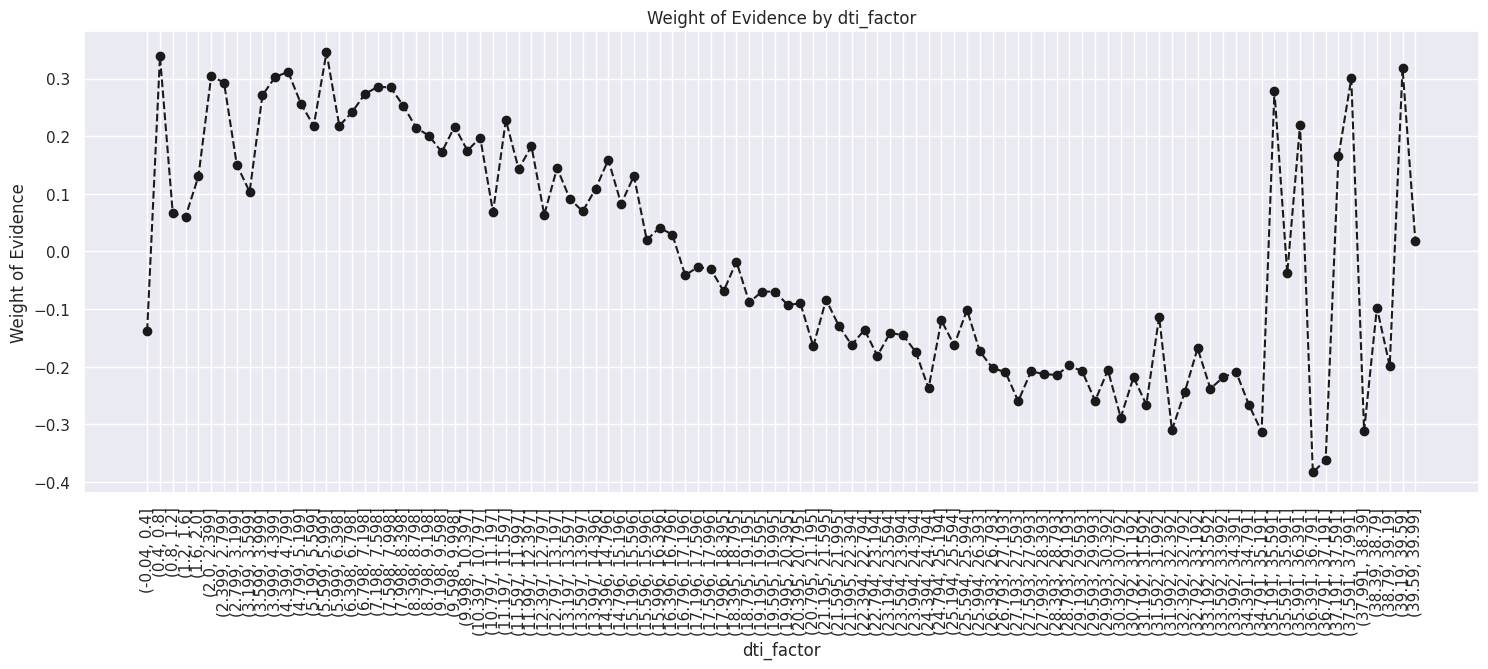

In [151]:
plot_by_woe(df_temp, 90)

In [154]:
# Creating categories
loan_data_inputs_train['dti:<=1.4'] = np.where((loan_data_inputs_train['dti'] <= 1.4), 1, 0)
loan_data_inputs_train['dti:1.4-3.5'] = np.where((loan_data_inputs_train['dti'] > 1.4) & (loan_data_inputs_train['dti'] <= 3.5), 1, 0)
loan_data_inputs_train['dti:3.5-7.7'] = np.where((loan_data_inputs_train['dti'] > 3.5) & (loan_data_inputs_train['dti'] <= 7.7), 1, 0)
loan_data_inputs_train['dti:7.7-10.5'] = np.where((loan_data_inputs_train['dti'] > 7.7) & (loan_data_inputs_train['dti'] <= 10.5), 1, 0)
loan_data_inputs_train['dti:10.5-16.1'] = np.where((loan_data_inputs_train['dti'] > 10.5) & (loan_data_inputs_train['dti'] <= 16.1), 1, 0)
loan_data_inputs_train['dti:16.1-20.3'] = np.where((loan_data_inputs_train['dti'] > 16.1) & (loan_data_inputs_train['dti'] <= 20.3), 1, 0)
loan_data_inputs_train['dti:20.3-21.7'] = np.where((loan_data_inputs_train['dti'] > 20.3) & (loan_data_inputs_train['dti'] <= 21.7), 1, 0)
loan_data_inputs_train['dti:21.7-22.4'] = np.where((loan_data_inputs_train['dti'] > 21.7) & (loan_data_inputs_train['dti'] <= 22.4), 1, 0)
loan_data_inputs_train['dti:22.4-35'] = np.where((loan_data_inputs_train['dti'] > 22.4) & (loan_data_inputs_train['dti'] <= 35), 1, 0)
loan_data_inputs_train['dti:>35'] = np.where((loan_data_inputs_train['dti'] > 35), 1, 0)

/tmp/ipykernel_72725/695011886.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train['dti:1.4-3.5'] = np.where((loan_data_inputs_train['dti'] > 1.4) & (loan_data_inputs_train['dti'] <= 3.5), 1, 0)
/tmp/ipykernel_72725/695011886.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train['dti:3.5-7.7'] = np.where((loan_data_inputs_train['dti'] > 3.5) & (loan_data_inputs_train['dti'] <= 7.7), 1, 0)
/tmp/ipykernel_72725/695011886.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is 

In [177]:
# Creating categories
loan_data_inputs_test['dti:<=1.4'] = np.where((loan_data_inputs_test['dti'] <= 1.4), 1, 0)
loan_data_inputs_test['dti:1.4-3.5'] = np.where((loan_data_inputs_test['dti'] > 1.4) & (loan_data_inputs_test['dti'] <= 3.5), 1, 0)
loan_data_inputs_test['dti:3.5-7.7'] = np.where((loan_data_inputs_test['dti'] > 3.5) & (loan_data_inputs_test['dti'] <= 7.7), 1, 0)
loan_data_inputs_test['dti:7.7-10.5'] = np.where((loan_data_inputs_test['dti'] > 7.7) & (loan_data_inputs_test['dti'] <= 10.5), 1, 0)
loan_data_inputs_test['dti:10.5-16.1'] = np.where((loan_data_inputs_test['dti'] > 10.5) & (loan_data_inputs_test['dti'] <= 16.1), 1, 0)
loan_data_inputs_test['dti:16.1-20.3'] = np.where((loan_data_inputs_test['dti'] > 16.1) & (loan_data_inputs_test['dti'] <= 20.3), 1, 0)
loan_data_inputs_test['dti:20.3-21.7'] = np.where((loan_data_inputs_test['dti'] > 20.3) & (loan_data_inputs_test['dti'] <= 21.7), 1, 0)
loan_data_inputs_test['dti:21.7-22.4'] = np.where((loan_data_inputs_test['dti'] > 21.7) & (loan_data_inputs_test['dti'] <= 22.4), 1, 0)
loan_data_inputs_test['dti:22.4-35'] = np.where((loan_data_inputs_test['dti'] > 22.4) & (loan_data_inputs_test['dti'] <= 35), 1, 0)
loan_data_inputs_test['dti:>35'] = np.where((loan_data_inputs_test['dti'] > 35), 1, 0)

/tmp/ipykernel_72725/1141259506.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_test['dti:<=1.4'] = np.where((loan_data_inputs_test['dti'] <= 1.4), 1, 0)
/tmp/ipykernel_72725/1141259506.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_test['dti:1.4-3.5'] = np.where((loan_data_inputs_test['dti'] > 1.4) & (loan_data_inputs_test['dti'] <= 3.5), 1, 0)
/tmp/ipykernel_72725/1141259506.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

### Preprocessing Continuous Variables: mths_since_last_record

In [155]:
# Calculating WoE for "mths_since_last_record"
loan_data_inputs_train_temp = loan_data_inputs_train[pd.notnull(loan_data_inputs_train['mths_since_last_record'])]
loan_data_inputs_train_temp['mths_since_last_record_factor'] = pd.cut(loan_data_inputs_train_temp['mths_since_last_record'], 50)

df_temp = woe_ordered_continuous(loan_data_inputs_train_temp, 'mths_since_last_record_factor', loan_data_targets_train[loan_data_inputs_train_temp.index])
df_temp

/tmp/ipykernel_72725/395690483.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train_temp['mths_since_last_record_factor'] = pd.cut(loan_data_inputs_train_temp['mths_since_last_record'], 50)
/tmp/ipykernel_72725/395690483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_inputs_train_temp['mths_since_last_record_factor'] = pd.cut(loan_data_inputs_train_temp['mths_since_last_record'], 50)


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",1086,0.764273,0.021691,830.0,256.0,0.018569,0.047672,-0.942830,NaN,NaN,0.080659
1,"(2.42, 4.84]",76,0.894737,0.001518,68.0,8.0,0.001521,0.001490,0.020988,0.130464,0.963818,0.080659
2,"(4.84, 7.26]",163,0.914110,0.003256,149.0,14.0,0.003334,0.002607,0.245810,0.019374,0.224823,0.080659
3,"(7.26, 9.68]",156,0.903846,0.003116,141.0,15.0,0.003155,0.002793,0.121631,0.010264,0.124179,0.080659
4,"(9.68, 12.1]",292,0.907534,0.005832,265.0,27.0,0.005929,0.005028,0.164814,0.003688,0.043183,0.080659
5,"(12.1, 14.52]",207,0.917874,0.004134,190.0,17.0,0.004251,0.003166,0.294732,0.010340,0.129918,0.080659
6,"(14.52, 16.94]",210,0.928571,0.004194,195.0,15.0,0.004363,0.002793,0.445871,0.010697,0.151139,0.080659
7,"(16.94, 19.36]",334,0.907186,0.006671,303.0,31.0,0.006779,0.005773,0.160667,0.021386,0.285204,0.080659
8,"(19.36, 21.78]",283,0.936396,0.005652,265.0,18.0,0.005929,0.003352,0.570280,0.029210,0.409612,0.080659
9,"(21.78, 24.2]",455,0.898901,0.009088,409.0,46.0,0.009151,0.008566,0.065995,0.037495,0.504284,0.080659


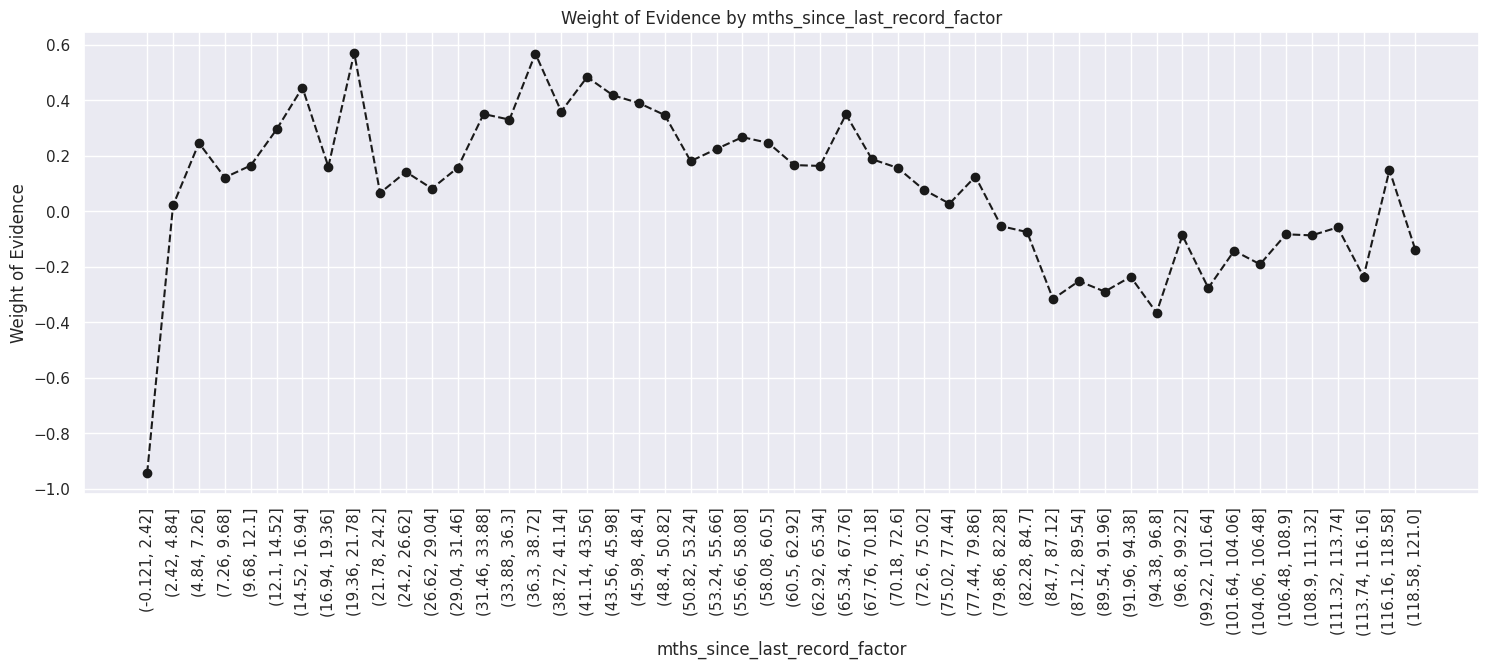

In [156]:
plot_by_woe(df_temp, 90)

In [157]:
# Creating categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
loan_data_inputs_train['mths_since_last_record:Missing'] = np.where((loan_data_inputs_train['mths_since_last_record'].isnull()), 1, 0)
loan_data_inputs_train['mths_since_last_record:0-2'] = np.where((loan_data_inputs_train['mths_since_last_record'] >= 0) & (loan_data_inputs_train['mths_since_last_record'] <= 2), 1, 0)
loan_data_inputs_train['mths_since_last_record:3-20'] = np.where((loan_data_inputs_train['mths_since_last_record'] >= 3) & (loan_data_inputs_train['mths_since_last_record'] <= 20), 1, 0)
loan_data_inputs_train['mths_since_last_record:21-31'] = np.where((loan_data_inputs_train['mths_since_last_record'] >= 21) & (loan_data_inputs_train['mths_since_last_record'] <= 31), 1, 0)
loan_data_inputs_train['mths_since_last_record:32-80'] = np.where((loan_data_inputs_train['mths_since_last_record'] >= 32) & (loan_data_inputs_train['mths_since_last_record'] <= 80), 1, 0)
loan_data_inputs_train['mths_since_last_record:81-86'] = np.where((loan_data_inputs_train['mths_since_last_record'] >= 81) & (loan_data_inputs_train['mths_since_last_record'] <= 86), 1, 0)
loan_data_inputs_train['mths_since_last_record:>86'] = np.where((loan_data_inputs_train['mths_since_last_record'] > 86), 1, 0)

/tmp/ipykernel_72725/4160190365.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train['mths_since_last_record:Missing'] = np.where((loan_data_inputs_train['mths_since_last_record'].isnull()), 1, 0)
/tmp/ipykernel_72725/4160190365.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_train['mths_since_last_record:0-2'] = np.where((loan_data_inputs_train['mths_since_last_record'] >= 0) & (loan_data_inputs_train['mths_since_last_record'] <= 2), 1, 0)
/tmp/ipykernel_72725/4160190365.py:4: Performa

In [178]:
# Creating categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
loan_data_inputs_test['mths_since_last_record:Missing'] = np.where((loan_data_inputs_test['mths_since_last_record'].isnull()), 1, 0)
loan_data_inputs_test['mths_since_last_record:0-2'] = np.where((loan_data_inputs_test['mths_since_last_record'] >= 0) & (loan_data_inputs_test['mths_since_last_record'] <= 2), 1, 0)
loan_data_inputs_test['mths_since_last_record:3-20'] = np.where((loan_data_inputs_test['mths_since_last_record'] >= 3) & (loan_data_inputs_test['mths_since_last_record'] <= 20), 1, 0)
loan_data_inputs_test['mths_since_last_record:21-31'] = np.where((loan_data_inputs_test['mths_since_last_record'] >= 21) & (loan_data_inputs_test['mths_since_last_record'] <= 31), 1, 0)
loan_data_inputs_test['mths_since_last_record:32-80'] = np.where((loan_data_inputs_test['mths_since_last_record'] >= 32) & (loan_data_inputs_test['mths_since_last_record'] <= 80), 1, 0)
loan_data_inputs_test['mths_since_last_record:81-86'] = np.where((loan_data_inputs_test['mths_since_last_record'] >= 81) & (loan_data_inputs_test['mths_since_last_record'] <= 86), 1, 0)
loan_data_inputs_test['mths_since_last_record:>86'] = np.where((loan_data_inputs_test['mths_since_last_record'] > 86), 1, 0)

/tmp/ipykernel_72725/1715739239.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_test['mths_since_last_record:Missing'] = np.where((loan_data_inputs_test['mths_since_last_record'].isnull()), 1, 0)
/tmp/ipykernel_72725/1715739239.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_test['mths_since_last_record:0-2'] = np.where((loan_data_inputs_test['mths_since_last_record'] >= 0) & (loan_data_inputs_test['mths_since_last_record'] <= 2), 1, 0)
/tmp/ipykernel_72725/1715739239.py:4: PerformanceWa

### Saving the data

In [179]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')